# Deep Learning on the Dow Jones index 

Requirements:

!pip install talos

## Data loading

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import os

Data is scrapped from Google finance using the python library pandas_datareader.

In [2]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2020, 1, 1)

start_date_str = str(start_date.date())
end_date_str = str(end_date.date())

The Dow Jones is composed of 30 indices but we need to keep only the ones that are present between 2010 and 2020 as some companies can be added and removed. 

In [3]:
data = []
data.append(['3M', 'NYSE', 'MMM', 'Conglomerate', datetime.datetime(1976, 8, 9), 0.038])
data.append(['American Express', 'NYSE', 'AXP', 'Financial services', datetime.datetime(1982, 8, 30), 0.0235])
data.append(['Amgen', 'NASDAQ', 'AMGN', 'Pharmaceutical industry', datetime.datetime(2020, 8, 31), 0.0581])
data.append(['Apple', 'NASDAQ', 'AAPL', 'Information technology', datetime.datetime(2015, 3, 19), 0.0287])
data.append(['Boeing', 'NYSE', 'BA', 'Aerospace and defense', datetime.datetime(1987, 3, 12) , 0.0404])
data.append(['Caterpillar', 'NYSE', 'CAT', 'Construction and Mining', datetime.datetime(1991, 5, 6), 0.0330])
data.append(['Chevron Corporation', 'NYSE', 'CVX', 'Petroleum industry', datetime.datetime(2008, 2, 19), 0.0197])
data.append(['Cisco Systems', 'NASDAQ', 'CSCO', 'Information technology', datetime.datetime(2009, 6, 8), 0.0097])
data.append(['Coca-Cola', 'NYSE', 'KO', 'Food industry', datetime.datetime(1987, 3, 12), 0.0114])
data.append(['Dow Inc.', 'NYSE', 'DOW', 'Chemical industry', datetime.datetime(2019, 4, 2), 0.0106])
data.append(['Goldman Sachs', 'NYSE', 'GS', 'Financial services', datetime.datetime(2013, 9, 20), 0.0477])
data.append(['The Home Depot', 'NYSE', 'HD', 'Retailing', datetime.datetime(1999, 11, 1), 0.0657])
data.append(['Honeywell', 'NYSE', 'HON', 'Conglomerate', datetime.datetime(2020, 8, 31), 0.0387])
data.append(['IBM', 'NYSE', 'IBM', 'Information technology', datetime.datetime(1979, 6, 29), 0.0287])
data.append(['Intel', 'NASDAQ', 'INTC', 'Information technology', datetime.datetime(1999, 11, 1), 0.011])
data.append(['Johnson & Johnson', 'NYSE', 'JNJ', 'Pharmaceutical industry', datetime.datetime(1997, 3, 17), 0.0353])
data.append(['JPMorgan Chase', 'NYSE', 'JPM', 'Financial services', datetime.datetime(1991, 5, 6), 0.0236])
data.append(['McDonald\'s', 'NYSE', 'MCD', 'Food industry', datetime.datetime(1985, 10, 30), 0.0493])
data.append(['Merck & Co.', 'NYSE', 'MRK', 'Pharmaceutical industry', datetime.datetime(1979, 6, 29), 0.0197])
data.append(['Microsoft', 'NASDAQ', 'MSFT', 'Information technology', datetime.datetime(1999, 11, 1), 0.0526])
data.append(['Nike', 'NYSE', 'NKE', 'Apparel' , datetime.datetime(2013, 9, 20), 0.0258])
data.append(['Procter & Gamble', 'NYSE', 'PG', 'Fast-moving consumer goods', datetime.datetime(1932, 5, 26), 0.0319])
data.append(['Salesforce', 'NYSE',  'CRM', 'Information technology', datetime.datetime(2020, 8, 31), 0.0623])
data.append(['The Travelers Companies', 'NYSE', 'TRV', 'Financial services', datetime.datetime(2009, 6, 8), 0.0266])
data.append(['UnitedHealth Group', 'NYSE', 'UNH', 'Managed health care', datetime.datetime(2012, 9, 24), 0.0722])
data.append(['Verizon', 'NYSE', 'VZ', 'Telecommunication', datetime.datetime(2004, 4, 8), 0.0136])
data.append(['Visa Inc', 'NYSE', 'V', 'Financial services', datetime.datetime(2013, 9, 20), 0.0495])
data.append(['Walgreens Boots Alliance', 'NASDAQ', 'WBA', 'Retailing', datetime.datetime(2018, 6, 26), 0.0089])
data.append(['Walmart', 'NYSE', 'WMT', 'Retailing', datetime.datetime(1997, 3, 17), 0.0322])
data.append(['Walt Disney', 'NYSE', 'DIS', 'Broadcasting and entertainment', datetime.datetime(1991, 5, 6), 0.0311])
df_dow = pd.DataFrame(data, columns=['Company', 'Exchange', 'Ticker', 'Industry', 'Date added', 'Weight'])
df_dow.head()

Company Exchange Ticker                 Industry Date added  \
0                3M     NYSE    MMM             Conglomerate 1976-08-09   
1  American Express     NYSE    AXP       Financial services 1982-08-30   
2             Amgen   NASDAQ   AMGN  Pharmaceutical industry 2020-08-31   
3             Apple   NASDAQ   AAPL   Information technology 2015-03-19   
4            Boeing     NYSE     BA    Aerospace and defense 1987-03-12   

   Weight  
0  0.0380  
1  0.0235  
2  0.0581  
3  0.0287  
4  0.0404

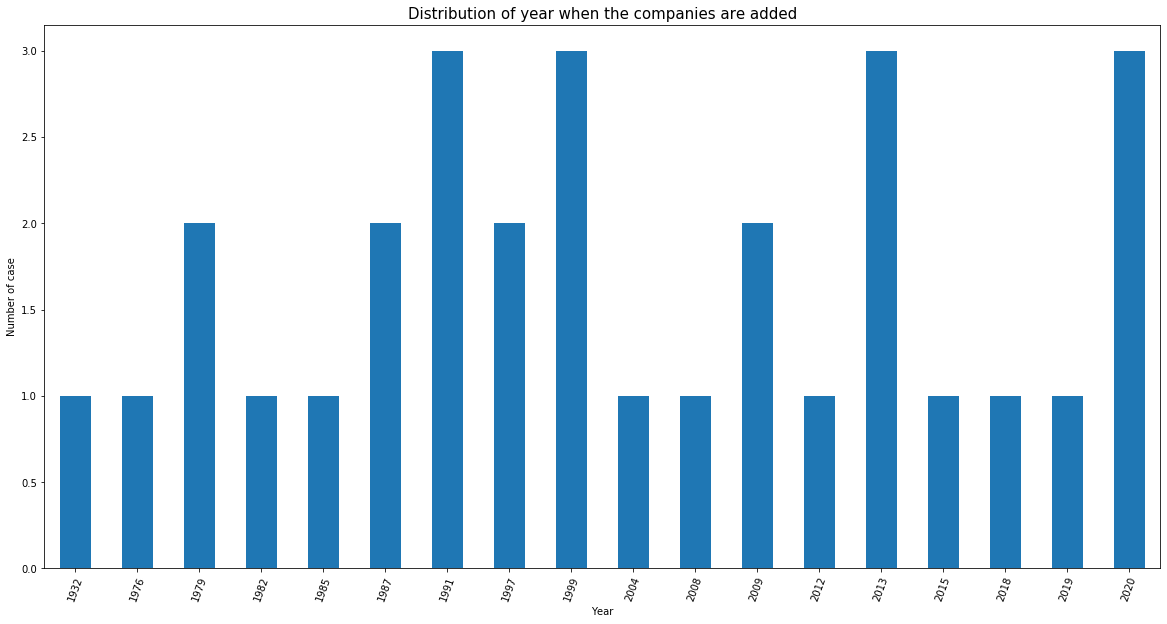

In [4]:
fig, ax = plt.subplots(figsize=(20,10))

df_dow['Date added'].dt.to_period('Y').value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of year when the companies are added",size=15)
ax.set_xlabel('Year')
ax.set_ylabel('Number of case')
plt.xticks(rotation=70)
plt.show()

In [5]:
sum((df_dow['Date added'] > end_date))

3

In [6]:
df_dow_kept = df_dow[(df_dow['Date added'] < start_date)]
df_dow_kept

Company Exchange Ticker                        Industry  \
0                        3M     NYSE    MMM                    Conglomerate   
1          American Express     NYSE    AXP              Financial services   
4                    Boeing     NYSE     BA           Aerospace and defense   
5               Caterpillar     NYSE    CAT         Construction and Mining   
6       Chevron Corporation     NYSE    CVX              Petroleum industry   
7             Cisco Systems   NASDAQ   CSCO          Information technology   
8                 Coca-Cola     NYSE     KO                   Food industry   
11           The Home Depot     NYSE     HD                       Retailing   
13                      IBM     NYSE    IBM          Information technology   
14                    Intel   NASDAQ   INTC          Information technology   
15        Johnson & Johnson     NYSE    JNJ         Pharmaceutical industry   
16           JPMorgan Chase     NYSE    JPM              Financial services   
17               McDonald's     NYSE    MCD                   Food industry   
18              Merck & Co.     NYSE    MRK         Pharmaceutical industry   
19                Microsoft   NASDAQ   MSFT          Information technology   
21         Procter & Gamble     NYSE     PG      Fast-moving consumer goods   
23  The Travelers Companies     NYSE    TRV              Financial services   
25                  Verizon     NYSE     VZ               Telecommunication   
28                  Walmart     NYSE    WMT                       Retailing   
29              Walt Disney     NYSE    DIS  Broadcasting and entertainment   

   Date added  Weight  
0  1976-08-09  0.0380  
1  1982-08-30  0.0235  
4  1987-03-12  0.0404  
5  1991-05-06  0.0330  
6  2008-02-19  0.0197  
7  2009-06-08  0.0097  
8  1987-03-12  0.0114  
11 1999-11-01  0.0657  
13 1979-06-29  0.0287  
14 1999-11-01  0.0110  
15 1997-03-17  0.0353  
16 1991-05-06  0.0236  
17 1985-10-30  0.0493  
18 1979-06-29  0.0197  
19 1999-11-01  0.0526  
21 1932-05-26  0.0319  
23 2009-06-08  0.0266  
25 2004-04-08  0.0136  
28 1997-03-17  0.0322  
29 1991-05-06  0.0311

## Exploratory Data Analysis 

Read the files.

In [9]:
for (i, ticker) in enumerate(df_dow_kept['Ticker']):
    file_name = 'data/' + ticker + '_' + start_date_str + '_to_' + end_date_str + '.csv'
    print(file_name)
    data = pd.read_csv(file_name, parse_dates=['date'], index_col=['date'])
    print(data.shape)
    data['Name'] = ticker
    data.to_csv(file_name)
    
    if i == 0:
        all_stocks = data
    else:
        all_stocks = all_stocks.append(data)

data/MMM_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/AXP_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/BA_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/CAT_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/CVX_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/CSCO_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/KO_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/HD_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/IBM_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/INTC_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/JNJ_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/JPM_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/MCD_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/MRK_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/MSFT_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/PG_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/TRV_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/VZ_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/WMT_2010-01-01_to_2020-01-01.csv
(2516, 14)
data/DIS_2010-01-01_to_2020-01-01.csv
(2516, 14)


In [10]:
all_stocks.head()

symbol  close   high    low   open   volume  \
date                                                                    
2010-01-04 00:00:00+00:00    MMM  83.02  83.45  82.67  83.09  3043700   
2010-01-05 00:00:00+00:00    MMM  82.50  83.23  81.70  82.80  2847000   
2010-01-06 00:00:00+00:00    MMM  83.67  84.60  83.51  83.88  5268500   
2010-01-07 00:00:00+00:00    MMM  83.73  83.76  82.12  83.32  4470100   
2010-01-08 00:00:00+00:00    MMM  84.32  84.32  83.30  83.69  3405800   

                            adjClose    adjHigh     adjLow    adjOpen  \
date                                                                    
2010-01-04 00:00:00+00:00  62.288212  62.610832  62.025614  62.340731   
2010-01-05 00:00:00+00:00  61.898066  62.445770  61.297842  62.123150   
2010-01-06 00:00:00+00:00  62.775893  63.473653  62.655849  62.933452   
2010-01-07 00:00:00+00:00  62.820910  62.843418  61.612960  62.513295   
2010-01-08 00:00:00+00:00  63.263575  63.263575  62.498290  62.790899   

                           adjVolume  divCash  splitFactor Name  
date                                                             
2010-01-04 00:00:00+00:00    3043700      0.0          1.0  MMM  
2010-01-05 00:00:00+00:00    2847000      0.0          1.0  MMM  
2010-01-06 00:00:00+00:00    5268500      0.0          1.0  MMM  
2010-01-07 00:00:00+00:00    4470100      0.0          1.0  MMM  
2010-01-08 00:00:00+00:00    3405800      0.0          1.0  MMM

### Taking as example American Express 

In [11]:
axp = pd.read_csv('data/AXP_2010-01-01_to_2020-01-01.csv', index_col='date', parse_dates=['date'])
axp.head()

symbol  close   high    low   open    volume  \
date                                                                     
2010-01-04 00:00:00+00:00    AXP  40.92  41.10  40.39  40.81   6894300   
2010-01-05 00:00:00+00:00    AXP  40.83  41.23  40.37  40.83  10641200   
2010-01-06 00:00:00+00:00    AXP  41.49  41.67  41.17  41.23   8399400   
2010-01-07 00:00:00+00:00    AXP  41.98  42.24  41.11  41.26   8981700   
2010-01-08 00:00:00+00:00    AXP  41.95  42.48  41.40  41.76   7907700   

                            adjClose    adjHigh     adjLow    adjOpen  \
date                                                                    
2010-01-04 00:00:00+00:00  34.658048  34.810503  34.209154  34.564881   
2010-01-05 00:00:00+00:00  34.581821  34.920609  34.192214  34.581821   
2010-01-06 00:00:00+00:00  35.140822  35.293276  34.869791  34.920609   
2010-01-07 00:00:00+00:00  35.708292  35.929449  34.968268  35.095858   
2010-01-08 00:00:00+00:00  35.682774  36.133593  35.214943  35.521159   

                           adjVolume  divCash  splitFactor Name  
date                                                             
2010-01-04 00:00:00+00:00    6894300     0.00          1.0  AXP  
2010-01-05 00:00:00+00:00   10641200     0.00          1.0  AXP  
2010-01-06 00:00:00+00:00    8399400     0.00          1.0  AXP  
2010-01-07 00:00:00+00:00    8981700     0.18          1.0  AXP  
2010-01-08 00:00:00+00:00    7907700     0.00          1.0  AXP

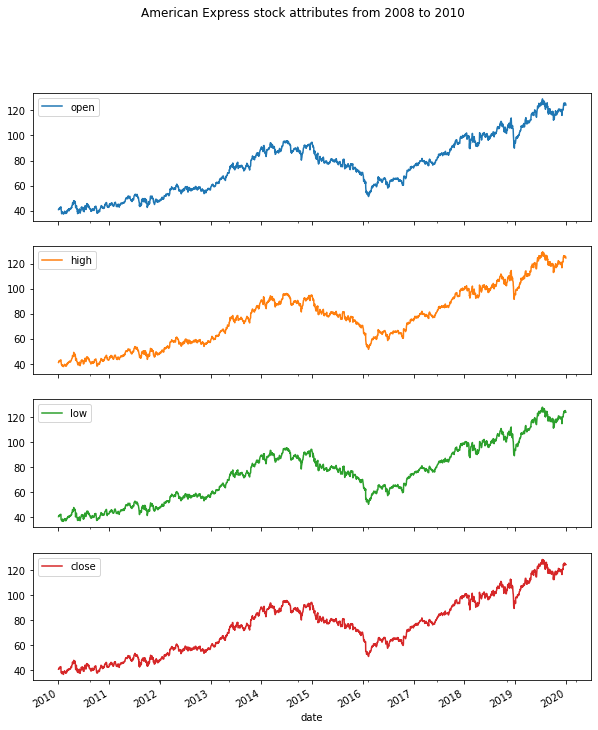

In [12]:
axp.loc[:,['open', 'high',  'low','close']].plot(subplots=True, figsize=(10,12), sharex='all', sharey='all', \
                                                 title = 'American Express stock attributes from 2008 to 2010')
#plt.savefig('axp_stock.png')
plt.show()

Both raw prices and adjusted prices are available. The adjustment methodology follows the standard method set forth by "The Center for Research in Security Prices" (CRSP). This methodology incorporates both split and dividend adjustments.

#### Percent change

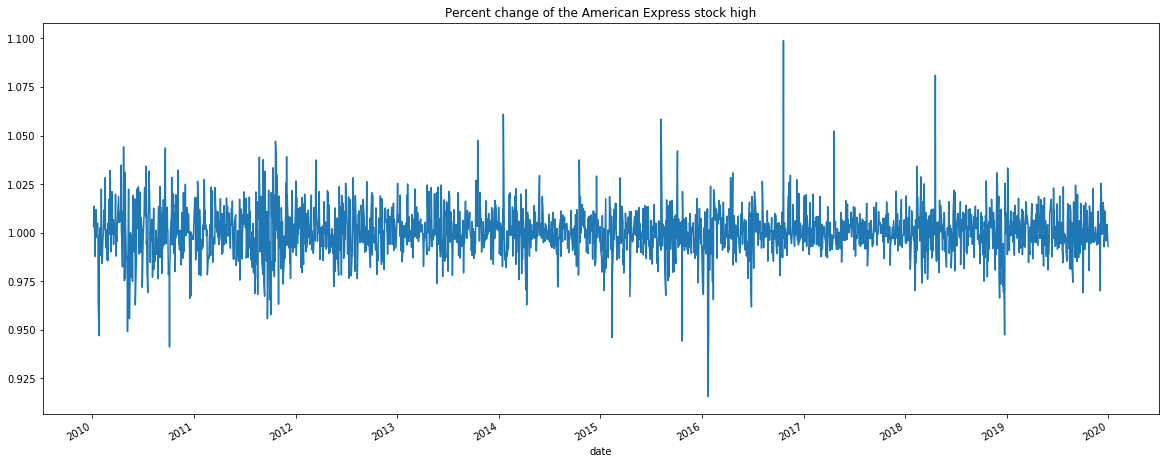

In [13]:
axp['Change'] = axp.high.div(axp.high.shift())
axp['Change'].plot(figsize=(20,8))
plt.title('Percent change of the American Express stock high')
plt.show()

#### Stock Returns

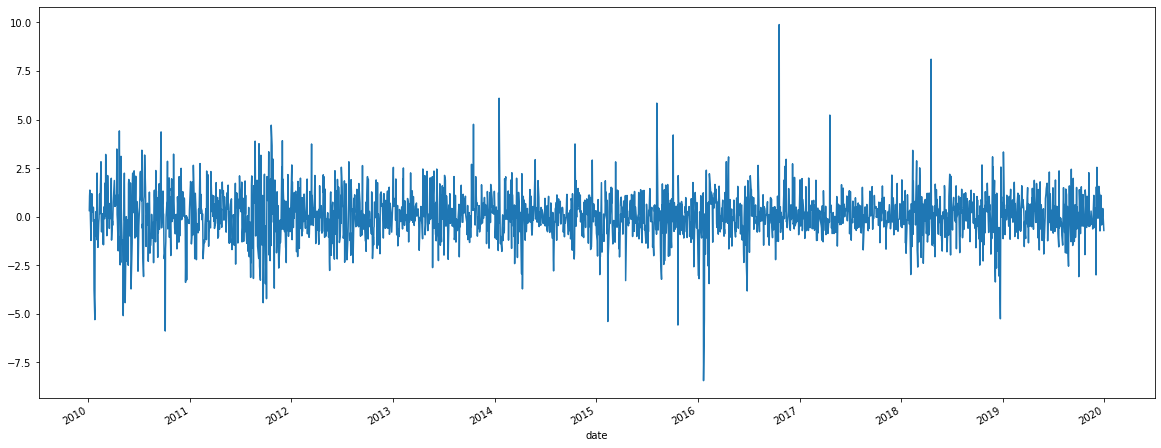

In [14]:
axp['Return'] = axp.Change.sub(1).mul(100)
axp['Return'].plot(figsize=(20,8))
plt.show()

#### OHLC (open-high-low-close) chart 

In [15]:
import plotly.graph_objects as go

ohlc = go.Ohlc(x=axp.reset_index()['date'].apply(lambda x : pd.Timestamp(x, unit='d')),
               open=axp['adjOpen'], high=axp['adjHigh'], low=axp['adjLow'], close=axp['adjClose'])
fig = go.Figure(data=ohlc)

fig.update_layout(title_text='American Express from 2010 to 2019',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, xaxis_title="Time", yaxis_title="Price")

## Statistical Models

In [16]:
data = axp['adjClose']
data

date
2010-01-04 00:00:00+00:00     34.658048
2010-01-05 00:00:00+00:00     34.581821
2010-01-06 00:00:00+00:00     35.140822
2010-01-07 00:00:00+00:00     35.708292
2010-01-08 00:00:00+00:00     35.682774
                                ...    
2019-12-24 00:00:00+00:00    122.562290
2019-12-26 00:00:00+00:00    123.220593
2019-12-27 00:00:00+00:00    123.004434
2019-12-30 00:00:00+00:00    122.129971
2019-12-31 00:00:00+00:00    122.316654
Name: adjClose, Length: 2516, dtype: float64

### Stationarity 

Most models make the assumption assume that the underlying time-series data is stationary.

Stationarity is a statistical assumption that a time-series has:

- Constant mean
- Constant variance
- Autocovariance does not depend on time

To test stationarity we can : 
    - Plot the moving average and variance and check if it changes through time
    - Compute the Dickey Fuller test with the null hypothesis that the time series is non-stationary

- Null Hypothesis (H0): If failed to be rejected (p-value > 0.05) , it suggests the time series is non-stationary and its properties are time dependent.
- Alternate Hypothesis (H1): The null hypothesis (p-value <= 0.05) is rejected; it suggests the time series is stationary.

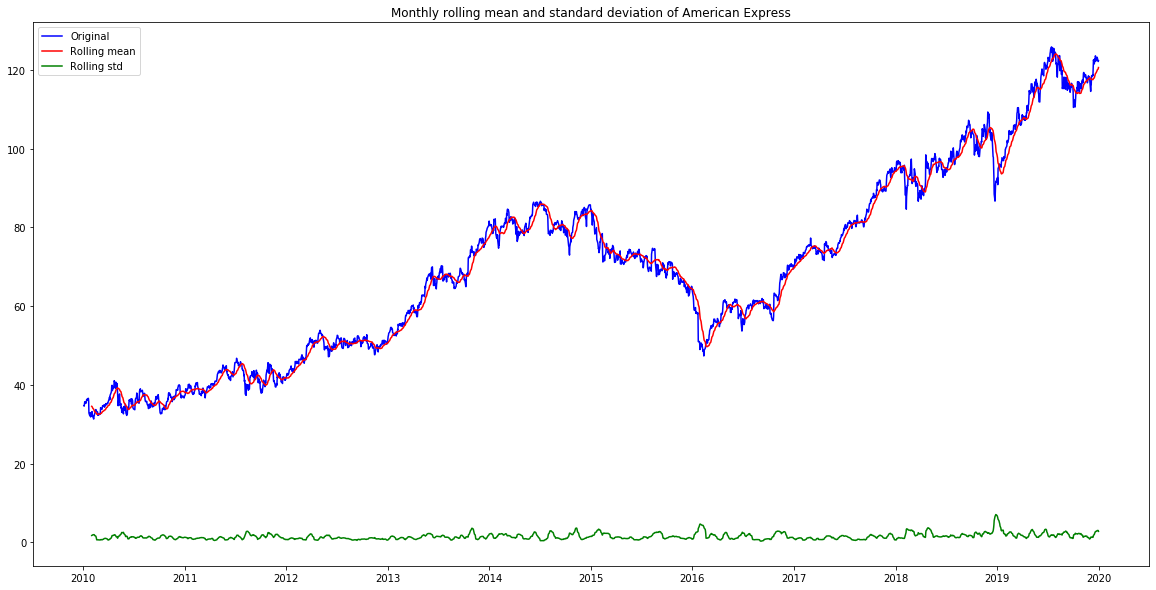

In [17]:
def plot_data(data, window=20, company = 'American Express'):
    
    rolling_window_year = data.rolling(window)
    rolling_mean = rolling_window_year.mean()
    rolling_std = rolling_window_year.std()
                                       
    fig, ax = plt.subplots(figsize=(20,10))
    plt.plot(data, color='blue',label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling mean')
    plt.plot(rolling_std, color='green', label = 'Rolling std')
    plt.legend(loc='best')
    plt.title('Monthly rolling mean and standard deviation of %s' %company)
    plt.show()
plot_data(data)    

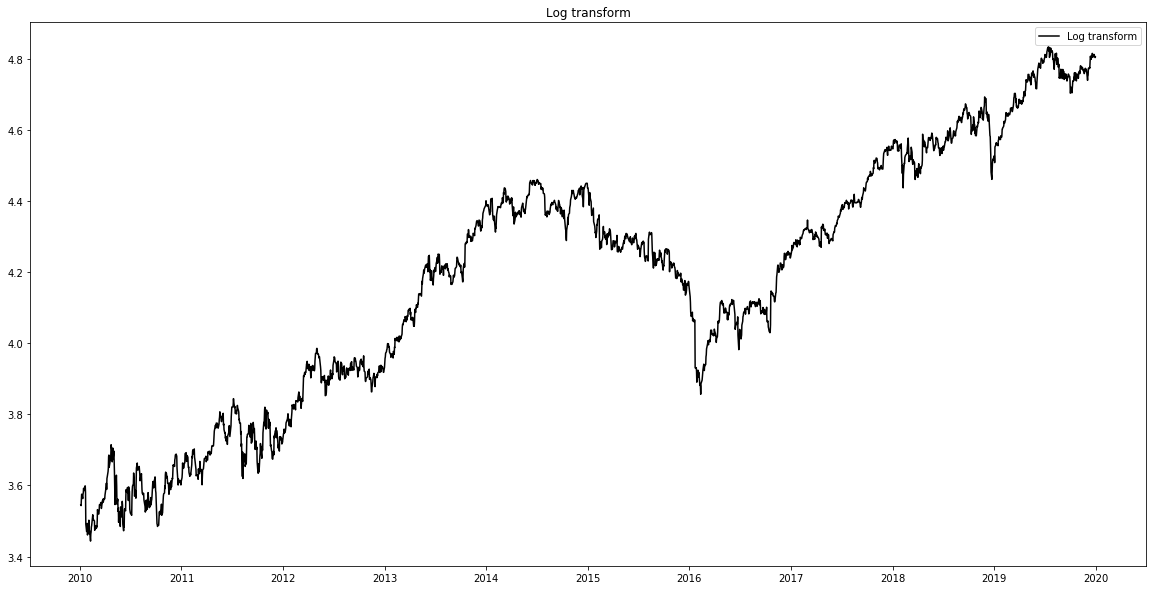

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.log(data), color='black',label='Log transform')
plt.legend(loc='best')
plt.title('Log transform')
plt.show()

For the Dickey-Fuller test we set the critical value to 0.05

In [19]:
from statsmodels.tsa.stattools import adfuller

def df_test(data):
    result = adfuller(data)
    print('Test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Number lags used %f' % result[2])
    print('Number of Observations Used %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

df_test(data)  

Test statistic: -0.278887
p-value: 0.928442
Number lags used 0.000000
Number of Observations Used 2515.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The statistical values of -0.28 is bigger than the value of -3.44 at 5%. This implies that we fail to reject the null hypothesis that the time series is non stationary.

In [20]:
df_test(np.log(data))

Test statistic: -0.923944
p-value: 0.779985
Number lags used 5.000000
Number of Observations Used 2510.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Same result for the log transform, we fail to reject the null hypothesis.

We need to make the series stationary through other transformations.

There can be 2 mains reasons for non stationarity : 
- Trends, with mean varying over time
- Seasonality with variations at specific time frames.

We need to check the presence of trends and seasonality, if they are present to model them and to remove them from the original series. Once we have stationary data we can apply the statistical models, predict and then then go back to the original scale.

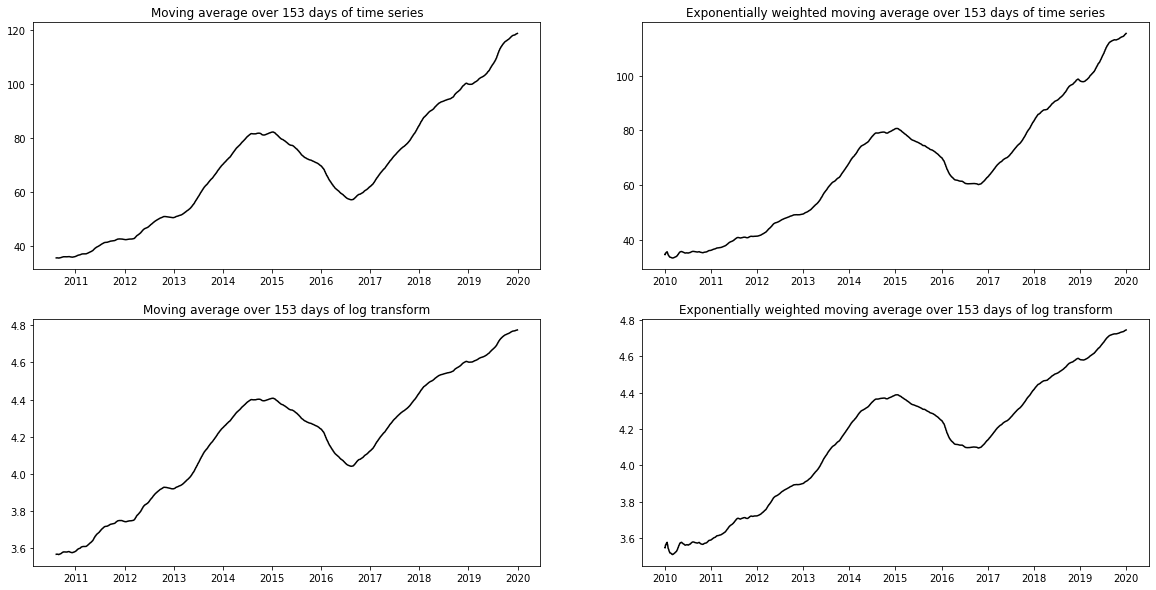

In [22]:
fig, axs = plt.subplots(figsize=(20,10), nrows =2 , ncols= 2)
data_log = np.log(data)

days = 153

data_mvg = data.rolling(window = days).mean()
axs[0,0].plot(data_mvg, color='black')
axs[0,0].set_title('Moving average over {:d} days of time series'.format(days))

# data_ewm = data.ewm(halflife= str(days)+' days', times=pd.DatetimeIndex(data.index.values)).mean()
data_ewm = data.ewm(alpha=0.01).mean()
axs[0,1].plot(data_ewm, color='black')
axs[0,1].set_title('Exponentially weighted moving average over {:d} days of time series'.format(days))

data_log_mvg = data_log.rolling(window = days).mean()
axs[1,0].plot(data_log_mvg, color='black')
axs[1,0].set_title('Moving average over {:d} days of log transform'.format(days))

# data_log_ewm = data_log.ewm(halflife= str(days)+' days', times=pd.DatetimeIndex(data_log.index.values)).mean()
data_log_ewm = data_log.ewm(alpha=0.01).mean()
axs[1,1].plot(data_log_ewm, color='black')
axs[1,1].set_title('Exponentially weighted moving average over {:d} days of log transform'.format(days))

plt.show()

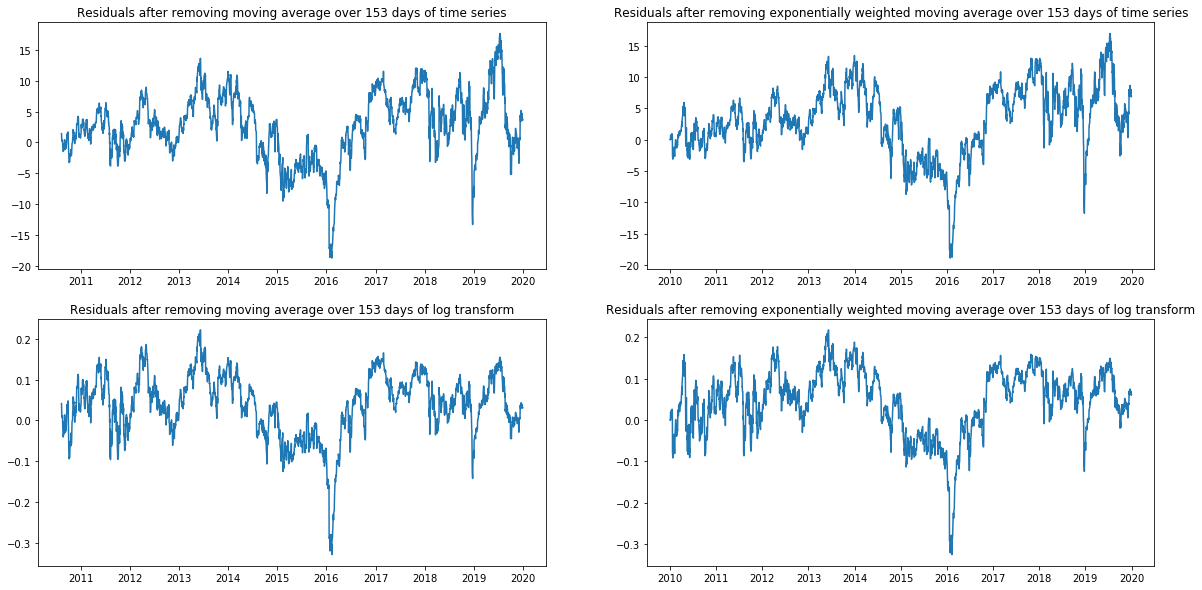

In [23]:
fig, axs = plt.subplots(figsize=(20,10), nrows =2 , ncols= 2)

data_mvg_diff = data - data_mvg

axs[0,0].plot(data_mvg_diff)
axs[0,0].set_title('Residuals after removing moving average over {:d} days of time series'.format(days))

data_ewm_diff = data - data_ewm

axs[0,1].plot(data_ewm_diff)
axs[0,1].set_title('Residuals after removing exponentially weighted moving average over {:d} days of time series'.format(days))

data_log_mvg_diff = data_log - data_log_mvg

axs[1,0].plot(data_log_mvg_diff)
axs[1,0].set_title('Residuals after removing moving average over {:d} days of log transform'.format(days))

data_log_ewm_diff = data_log - data_log_ewm

axs[1,1].plot(data_log_ewm_diff)
axs[1,1].set_title('Residuals after removing exponentially weighted moving average over {:d} days of log transform'.format(days))

plt.show()

We apply the Dickey Fuller test for each residuals time series. 

In [24]:
print('Residuals after removing moving average over {:d} days of time series :'.format(days))
data_mvg_diff.dropna(inplace = True)
df_test(data_mvg_diff)
print()

print('Residuals after removing exponentially weighted moving average over {:d} days of time series'.format(days))
data_ewm_diff.dropna(inplace = True)
df_test(data_ewm_diff)
print()

print('Residuals after removing moving average over {:d} days of log transform'.format(days))
data_log_mvg_diff.dropna(inplace = True)
df_test(data_log_mvg_diff)
print()

print('Residuals after removing exponentially weighted moving average over {:d} days of log transform'.format(days))
data_log_ewm_diff.dropna(inplace = True)
df_test(data_log_ewm_diff)

Residuals after removing moving average over 153 days of time series :
Test statistic: -4.310623
p-value: 0.000426
Number lags used 0.000000
Number of Observations Used 2363.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

Residuals after removing exponentially weighted moving average over 153 days of time series
Test statistic: -4.322581
p-value: 0.000406
Number lags used 0.000000
Number of Observations Used 2515.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

Residuals after removing moving average over 153 days of log transform
Test statistic: -4.208923
p-value: 0.000636
Number lags used 5.000000
Number of Observations Used 2358.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

Residuals after removing exponentially weighted moving average over 153 days of log transform
Test statistic: -4.331166
p-value: 0.000392
Number lags used 5.000000
Number of Observations Used 2510.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


For all transformations the test statistic is smaller than the 5% critical value and the p-value < 0.05 which allows us to reject the null hypothesis and to claim that the transformed time series is stationary. 

We also try other transformations such as first order differencing.

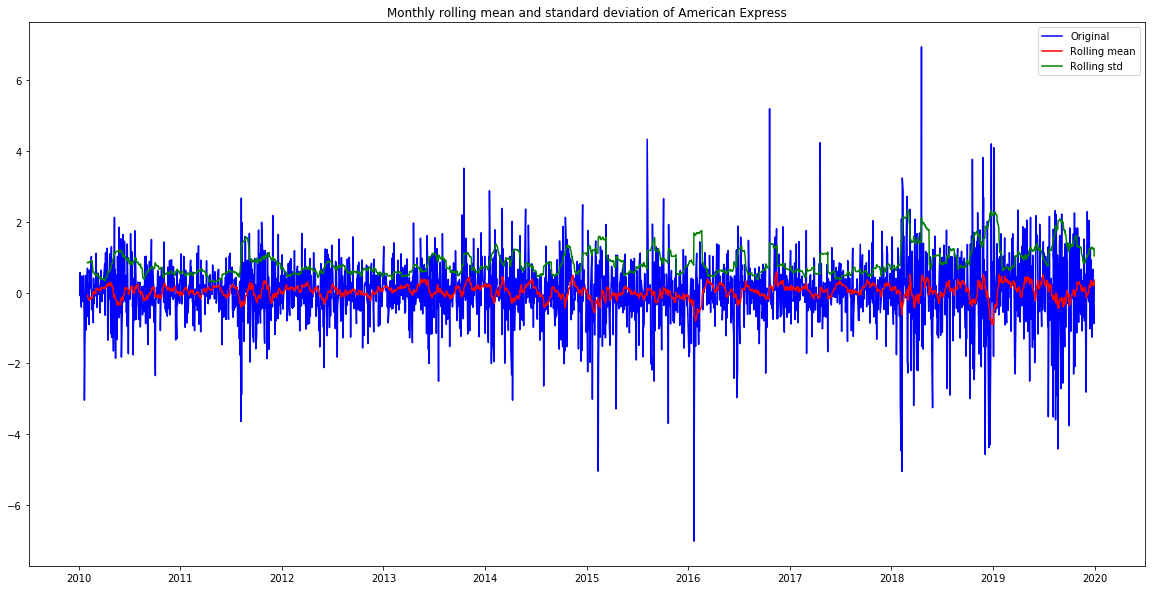

In [25]:
data_diff = data.diff()
data_diff.dropna(inplace = True)
plot_data(data_diff)

In [26]:
df_test(data_diff)

Test statistic: -51.070458
p-value: 0.000000
Number lags used 0.000000
Number of Observations Used 2514.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


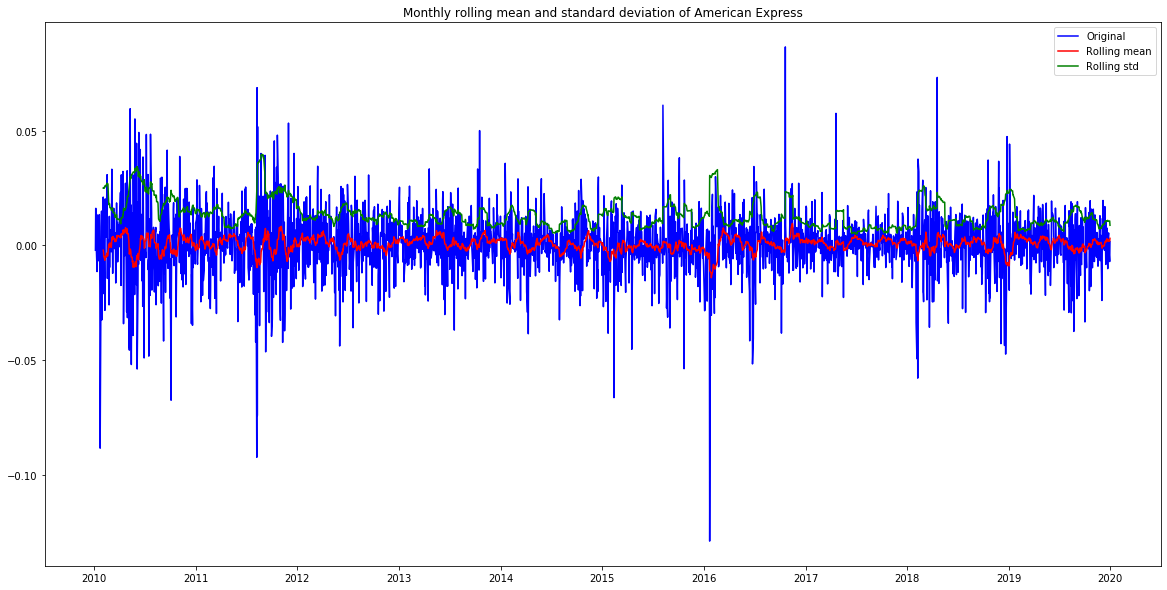

In [27]:
data_log_diff = data_log.diff()
data_log_diff.dropna(inplace = True)
plot_data(data_log_diff)

In [28]:
df_test(data_log_diff)

Test statistic: -23.596421
p-value: 0.000000
Number lags used 4.000000
Number of Observations Used 2510.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


### Time Series Decomposition

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components  each representing an underlying pattern category, typically a trend-cycles component and a seasonality component.

If we assume an additive decomposition, then we can write $y_{t} = S_{t} + T_{t} + R_{t}$

The first step in a classical decomposition is to use a moving average method to estimate the trend-cycle component.

Need to make a choice for the window of the moving average. Possibilities that make sense are 5,20 and 253. 
Five because that is how many trading days there are in a week, 20 trading days per month, and 253 per year 

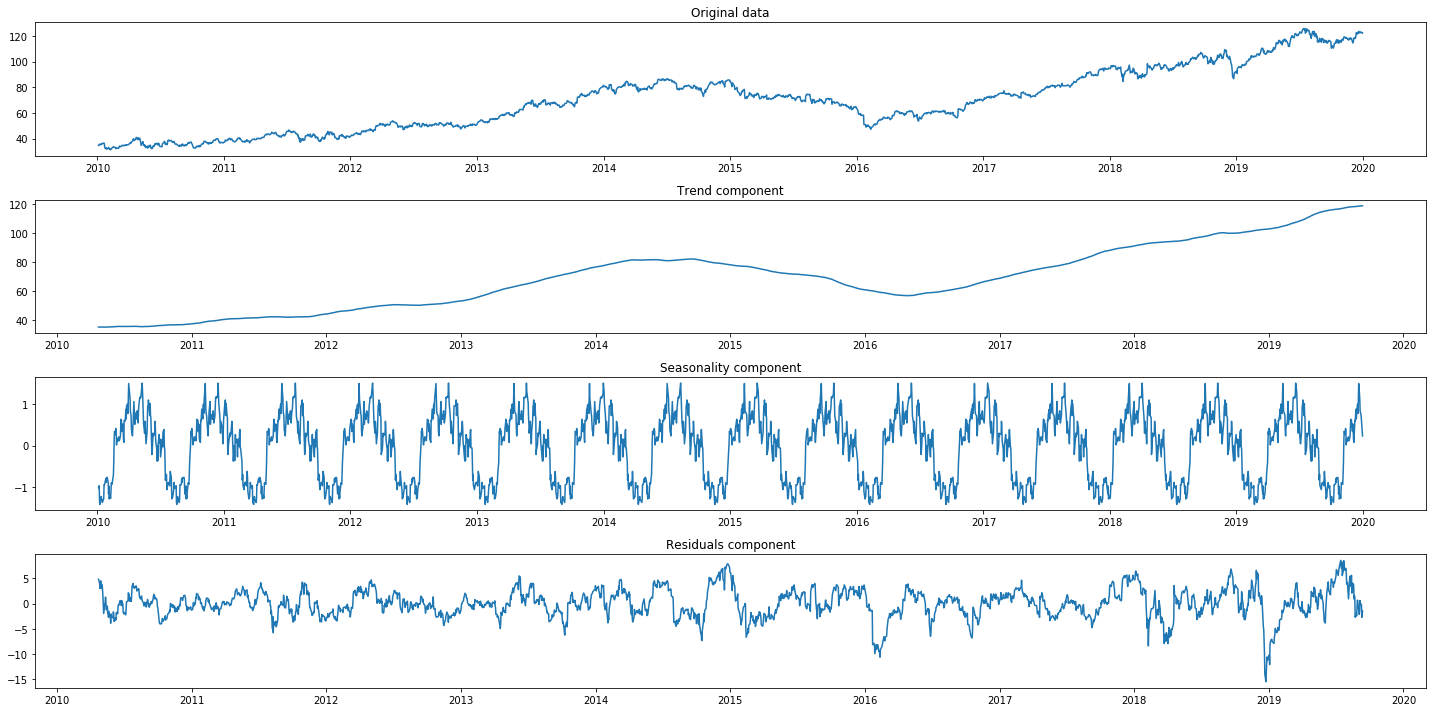

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose(data):
    window_size = 153
    decomposition = seasonal_decompose(data, period = window_size)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    fig, axs = plt.subplots(figsize=(20,10), nrows= 4, ncols= 1)

    axs[0].plot(data)
    axs[0].set_title('Original data')

    axs[1].plot(trend)
    axs[1].set_title('Trend component')

    axs[2].plot(seasonal)
    axs[2].set_title('Seasonality component')

    axs[3].plot(residual)
    axs[3].set_title('Residuals component')

    plt.tight_layout()
    plt.show()
    
    return trend, seasonal, residual

data_trend, data_seasonal, data_residual = decompose(data)

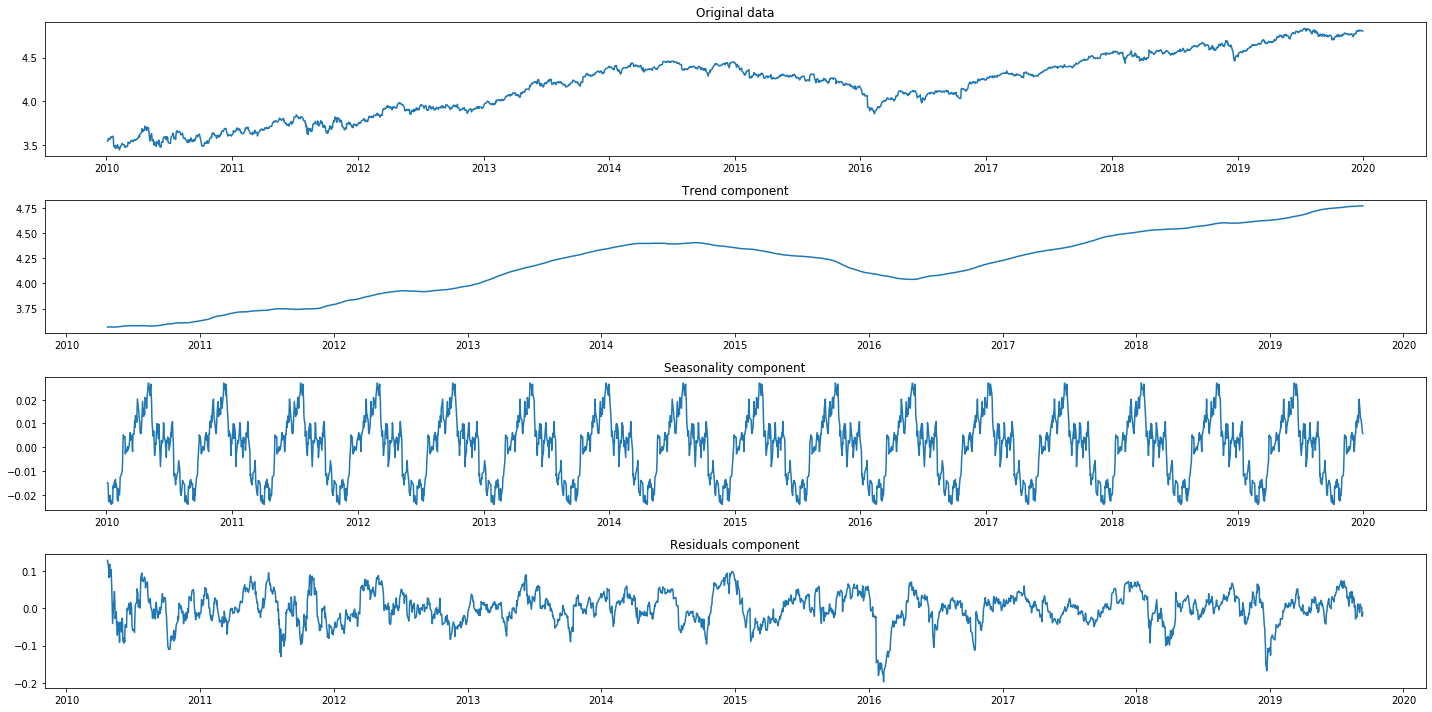

In [30]:
data_log_trend, data_log_seasonal, data_log_residual = decompose(data_log)

Now that we detrended and removed the seasonality component let's check if the residuals are stationary.

In [31]:
data_residual.dropna(inplace = True)
df_test(data_residual)

Test statistic: -8.041414
p-value: 0.000000
Number lags used 0.000000
Number of Observations Used 2363.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [32]:
data_log_residual.dropna(inplace = True)
df_test(data_log_residual)

Test statistic: -8.441728
p-value: 0.000000
Number lags used 2.000000
Number of Observations Used 2361.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The residual series are stationary.

To summarize the transfromation done :

    1. Original data => Not stationary
    2. Log transform => Not stationary
    3. Moving average over 153 days of time series => Stationary
    4. Exponentially weighted moving average over 153 days of time series => Stationary
    5. Moving average over 153 days of log transform => Stationary
    6. Exponentially weighted moving average over 153 days of log transform => Stationary
    7. First order differencing of time series => Stationary
    8. First order differencing of log transform => Stationary
    9. Seasonnal decomposition of time series => Stationary
    10. Seasonnal decomposition of log transform => Stationary

## Statistical Models

We will model the time series after differencing and for that we will use the Auto-Regressive Integrated Moving Averages (ARIMA) model. ARIMA(p,q,d) has 3 parameters : 
1. Number of of Auto regressive terms (p)
2. Number of Moving Average terms (q)
3. Number of differences (d)

In order to set these parameters, we need to plot the Autocorrelation function (ACF) and the Partial Autocorrelation function (PACF).

Moving average over 153 days of time series


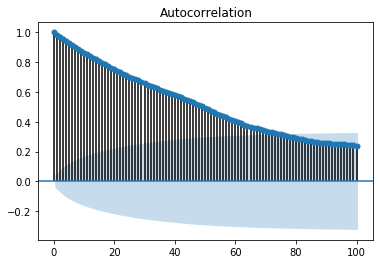

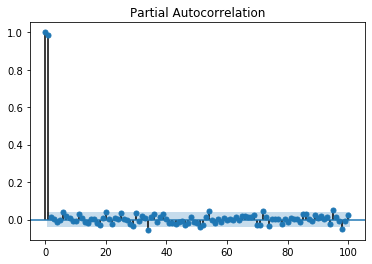

Exponentially weighted moving average over 153 days of time series


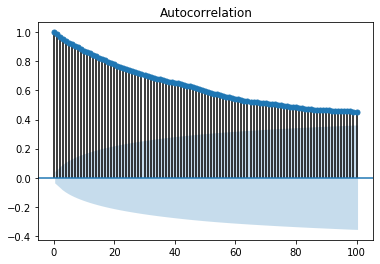

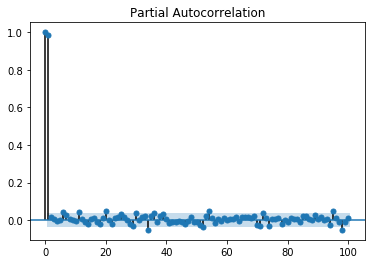

Moving average over 153 days of log transform


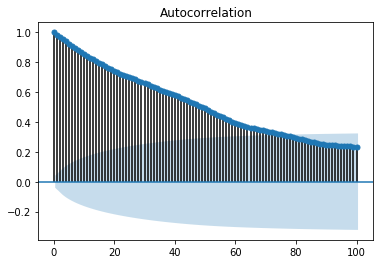

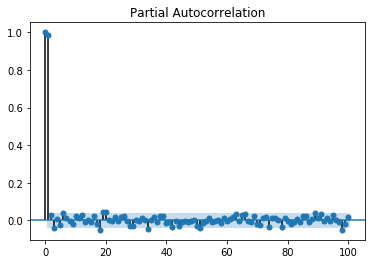

Exponentially weighted moving average over 153 days of log transform


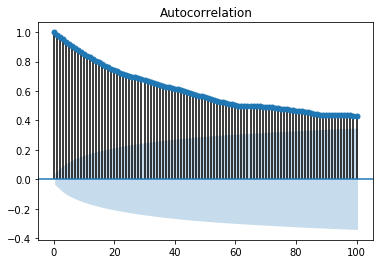

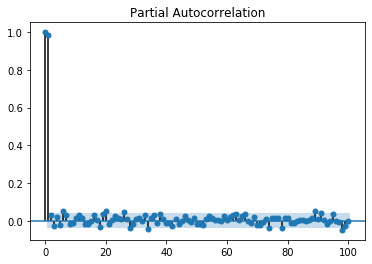

First order differencing of time series


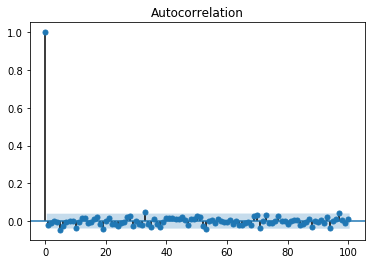

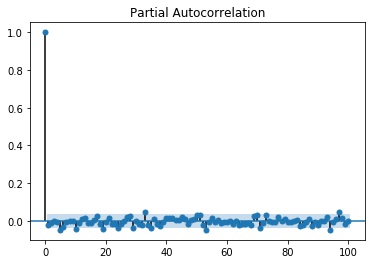

First order differencing of log transform


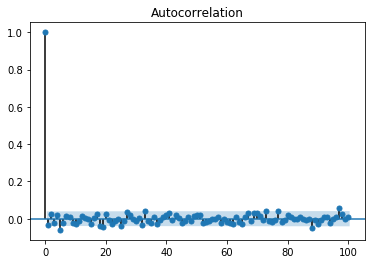

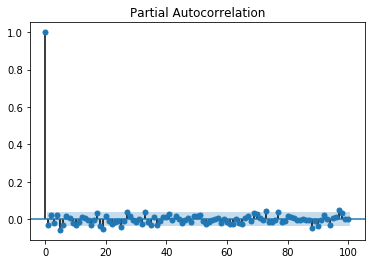

Seasonnal decomposition of time series


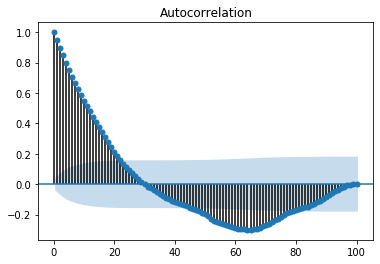

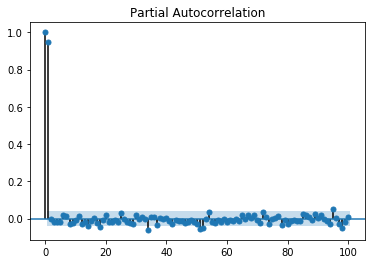

Seasonnal decomposition of log transform


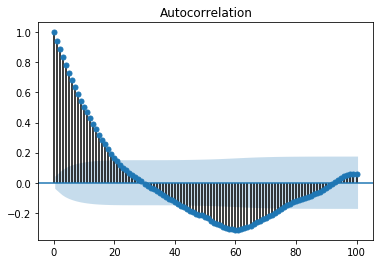

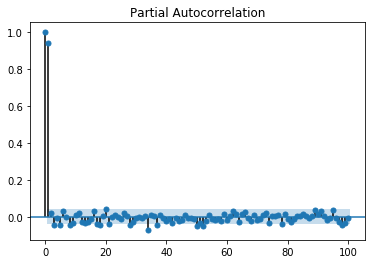

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

names = ['Moving average over 153 days of time series', 'Exponentially weighted moving average over 153 days of time series', \
        'Moving average over 153 days of log transform', 'Exponentially weighted moving average over 153 days of log transform',\
        'First order differencing of time series', 'First order differencing of log transform',
        'Seasonnal decomposition of time series', 'Seasonnal decomposition of log transform']

transformations = [data_mvg_diff, data_ewm_diff, data_log_mvg_diff, data_log_ewm_diff,data_diff, data_log_diff,\
                  data_residual, data_log_residual]

for name, e in zip(names,transformations) : 
    print(name)
    acf = plot_acf(e, lags=100)
    pacf = plot_pacf(e, lags=100)
    plt.show()

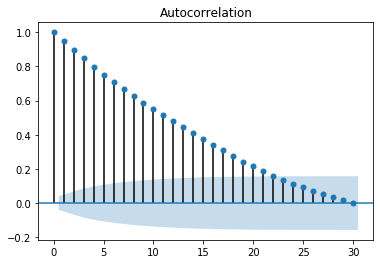

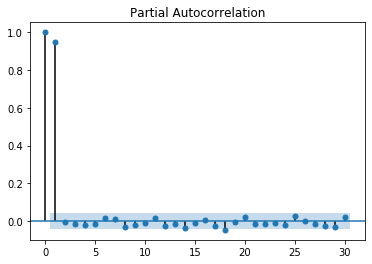

In [34]:
acf = plot_acf(data_residual, lags=30)
pacf = plot_pacf(data_residual, lags=30)

This gives us as parameters p= 21 and q=2 and d= 0 or 1

In [35]:
from statsmodels.tsa.arima.model import ARIMA
    
p = 0
d = 1
q = 1

model = ARIMA(data_residual, order=(p, d, q))  
fitted_model = model.fit() 
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                 2364
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3114.868
Date:                Sat, 02 Jan 2021   AIC                           6233.735
Time:                        17:07:12   BIC                           6245.271
Sample:                             0   HQIC                          6237.935
                               - 2364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0212      0.015     -1.385      0.166      -0.051       0.009
sigma2         0.8175      0.012     66.031      0.000       0.793       0.842
Ljung-Box (Q):                       42.47   Jarque-

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



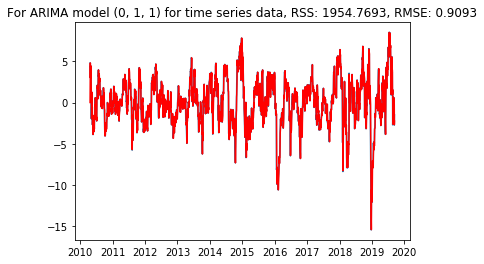

In [36]:
len_results = len(fitted_model.fittedvalues)
data_predicted = data_residual[-len_results:]

def rss_rmse(model, data_predicted):
    rss = sum((model.fittedvalues - data_predicted)**2)
    rmse = np.sqrt(rss / len(data_predicted))
    return rss, rmse

rss, rmse = rss_rmse(fitted_model, data_predicted) 

plt.plot(data_predicted)
plt.plot(fitted_model.fittedvalues, color = 'red')
plt.title('For ARIMA model (%i, %i, %i) for time series data, RSS: %.4f, RMSE: %.4f' %(p, d, q, rss, rmse))
plt.show()

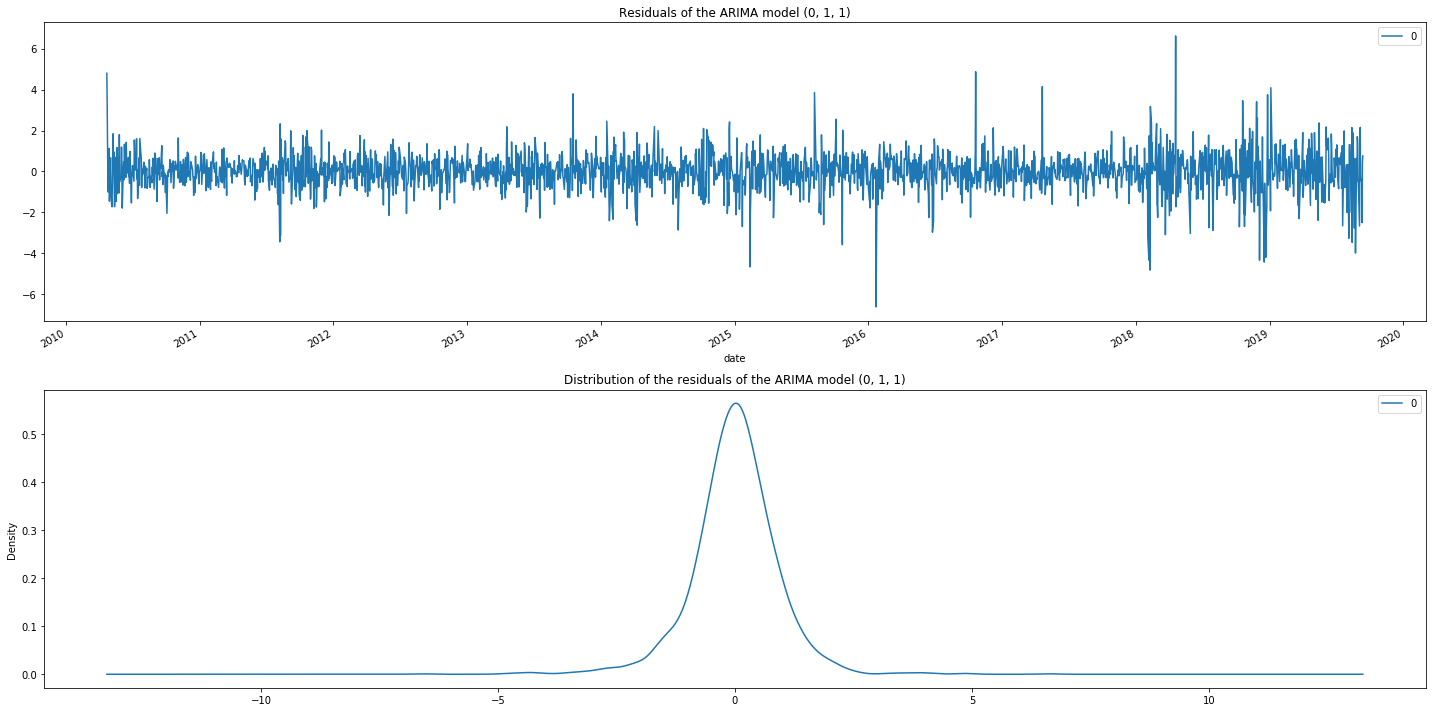

                 0
count  2364.000000
mean     -0.000697
std       0.909527
min      -6.627203
25%      -0.450677
50%       0.017814
75%       0.491891
max       6.622956


In [37]:
residuals = pd.DataFrame(fitted_model.resid)
fig, (ax1, ax2) = plt.subplots(figsize=(20,10), nrows =2 , ncols= 1)

residuals.plot(ax = ax1)
ax1.set_title('Residuals of the ARIMA model (%i, %i, %i)' %(p, d, q))

residuals.plot(kind='kde', ax= ax2)
ax2.set_title('Distribution of the residuals of the ARIMA model (%i, %i, %i)' %(p, d, q))

plt.tight_layout()
plt.show()
print(residuals.describe())

### Hyperparameter tuning

In [38]:
df = pd.DataFrame(data_residual).reset_index()
df['date'] = df['date'].apply(lambda x:  x.date())
df.set_index('date',inplace = True)
df.head()

resid
date                
2010-04-23  4.798716
2010-04-26  3.979493
2010-04-27  2.984057
2010-04-28  3.356683
2010-04-29  4.472422

In [39]:
def split_by_date_train_cross_val_test(X, end_training_date, end_cross_val_date):
    
    df_train = X[X.index <= pd.to_datetime(end_training_date)]
    df_cross_val = X[(X.index > pd.to_datetime(end_training_date)) & (X.index <= pd.to_datetime(end_cross_val_date))]
    df_test = X[(X.index > pd.to_datetime(end_training_date)) & (X.index > pd.to_datetime(end_cross_val_date))]
    
    return df_train, df_cross_val, df_test

In [40]:
end_training_date = '2017-12-31' 
end_cross_val_date = '2018-12-31' 

df_train, df_cross_val, df_test = split_by_date_train_cross_val_test(df, end_training_date, end_cross_val_date)

In [41]:
df_cross_val

resid
date                 
2018-01-02   4.659785
2018-01-03   4.986761
2018-01-04   6.262467
2018-01-05   6.422075
2018-01-08   5.461522
...               ...
2018-12-24 -15.468006
2018-12-26 -11.686010
2018-12-27 -10.556968
2018-12-28 -11.251518
2018-12-31 -10.664359

[251 rows x 1 columns]

To predict on the test, a rolling forecasting procedure is required given the dependence on observations in prior time steps for differencing and the AR model. To this end, we re-create the ARIMA model after each new observation is received.

In [42]:
for e in pd.DataFrame([1,2,3]):
    print(e)

0


In [43]:
df_cross_val.append(df_train.iloc[0])

resid
date                 
2018-01-02   4.659785
2018-01-03   4.986761
2018-01-04   6.262467
2018-01-05   6.422075
2018-01-08   5.461522
...               ...
2018-12-26 -11.686010
2018-12-27 -10.556968
2018-12-28 -11.251518
2018-12-31 -10.664359
2010-04-23   4.798716

[252 rows x 1 columns]

In [44]:
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings('ignore')
import math 


p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 4)

def hyperparameter_tuning_ARIMA(train_set, cross_val_set, p_values, d_values, q_values):
    
    best_rmse = float("inf")
    best_params = None 
    
    for p in p_values:
        for q in q_values:
            for d in d_values:
                
                predictions = []
                train_set_extended = train_set.copy()
                
                #cross validation
                for date, value in cross_val_set.iterrows():
                    
                    #train new model with extended training set
                    model = ARIMA(train_set_extended, order=(p, d, q))  
                    fitted_model = model.fit()
                    
                    #predict the next value
                    predictions.append(fitted_model.forecast().values[0])
                    
                    #update the train_set_with the old value
                    new_row = pd.DataFrame(value.values, index = [date], columns = cross_val_set.columns)
                    
                    train_set_extended = train_set_extended.append(new_row)
                    
                #compute rmse
                rmse = math.sqrt(mean_squared_error(cross_val_set, predictions))
                print('- ARIMA model (%i, %i, %i) RMSE: %.4f' %(p, d, q, rmse))
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = (p,d,q)
                
    return best_rmse, best_params

best_rmse, best_params = hyperparameter_tuning_ARIMA(df_train, df_cross_val, p_values, d_values, q_values)

- ARIMA model (0, 0, 0) RMSE: 3.7454
- ARIMA model (0, 1, 0) RMSE: 1.3770
- ARIMA model (0, 0, 1) RMSE: 2.3584
- ARIMA model (0, 1, 1) RMSE: 1.3784
- ARIMA model (0, 0, 2) RMSE: 1.9217
- ARIMA model (0, 1, 2) RMSE: 1.3795
- ARIMA model (0, 0, 3) RMSE: 1.6948
- ARIMA model (0, 1, 3) RMSE: 1.3829
- ARIMA model (1, 0, 0) RMSE: 1.3628
- ARIMA model (1, 1, 0) RMSE: 1.3784
- ARIMA model (1, 0, 1) RMSE: 1.3644
- ARIMA model (1, 1, 1) RMSE: 1.3580
- ARIMA model (1, 0, 2) RMSE: 1.3655
- ARIMA model (1, 1, 2) RMSE: 1.3534
- ARIMA model (1, 0, 3) RMSE: 1.3663
- ARIMA model (1, 1, 3) RMSE: 1.3683
- ARIMA model (2, 0, 0) RMSE: 1.3645
- ARIMA model (2, 1, 0) RMSE: 1.3795
- ARIMA model (2, 0, 1) RMSE: 1.3694
- ARIMA model (2, 1, 1) RMSE: 1.3655
- ARIMA model (2, 0, 2) RMSE: 1.3638
- ARIMA model (2, 1, 2) RMSE: 1.3659
- ARIMA model (2, 0, 3) RMSE: 1.3641


LinAlgError: LU decomposition error.

In [ ]:
print(best_rmse, best_params)

Using the best parameters of the cross validation.

In [ ]:
df_train_cross_val = pd.concat( [df_train,df_cross_val])

In [ ]:
test_rmse, _ = hyperparameter_tuning_ARIMA(df_train_cross_val, df_test, [1], [1], [2])

In [ ]:
print(test_rmse)

# LSTM 

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
import tensorflow as tf
import math
tf.random.set_seed(1)
np.random.seed(1)

In [46]:
df = pd.DataFrame(data).reset_index()
df.columns = ['ds','y']
df['ds'] = df['ds'].apply(lambda x:  x.date())
df

ds           y
0     2010-01-04   34.658048
1     2010-01-05   34.581821
2     2010-01-06   35.140822
3     2010-01-07   35.708292
4     2010-01-08   35.682774
...          ...         ...
2511  2019-12-24  122.562290
2512  2019-12-26  123.220593
2513  2019-12-27  123.004434
2514  2019-12-30  122.129971
2515  2019-12-31  122.316654

[2516 rows x 2 columns]

In [47]:
df.set_index('ds', inplace = True)
df.head()

y
ds                   
2010-01-04  34.658048
2010-01-05  34.581821
2010-01-06  35.140822
2010-01-07  35.708292
2010-01-08  35.682774

In [48]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled = pd.DataFrame(data = scaler.fit_transform(df), index = df.index.values)
df_scaled.head()

0
2010-01-04 -0.928835
2010-01-05 -0.930447
2010-01-06 -0.918623
2010-01-07 -0.906619
2010-01-08 -0.907159

In [49]:
window = 20

In [50]:
moving_avg = df_scaled.rolling(window, min_periods=window).mean()[window:]

exponential_moving_avg = df_scaled.ewm(alpha=0.1, adjust=False).mean()[window:]

cumulative_moving_avg = df_scaled.expanding().mean()[window:]

rstd = df_scaled.rolling(window=window).std()[window:]

upper_bollinger_band = moving_avg + 2 * rstd
lower_bollinger_band = moving_avg - 2 * rstd

We need to set the size of the window, that is the number of days we look back to in order to predict.

In [51]:
def transform_data(data, window_size = window):
    X = []
    for i in range (len(data) - window_size):
        X.append(data[i:i+window_size].values.reshape(-1))
        
    return pd.DataFrame(data= X, index = data.index[window_size:].values)

X = transform_data(df_scaled)
print(X.shape)
X.head()

(2496, 20)


0         1         2         3         4         5  \
2010-02-02 -0.928835 -0.930447 -0.918623 -0.906619 -0.907159 -0.915795   
2010-02-03 -0.930447 -0.918623 -0.906619 -0.907159 -0.915795 -0.905899   
2010-02-04 -0.918623 -0.906619 -0.907159 -0.915795 -0.905899 -0.903560   
2010-02-05 -0.906619 -0.907159 -0.915795 -0.905899 -0.903560 -0.894024   
2010-02-08 -0.907159 -0.915795 -0.905899 -0.903560 -0.894024 -0.899242   

                   6         7         8         9        10        11  \
2010-02-02 -0.905899 -0.903560 -0.894024 -0.899242 -0.888986 -0.888627   
2010-02-03 -0.903560 -0.894024 -0.899242 -0.888986 -0.888627 -0.903380   
2010-02-04 -0.894024 -0.899242 -0.888986 -0.888627 -0.903380 -0.967614   
2010-02-05 -0.899242 -0.888986 -0.888627 -0.903380 -0.967614 -0.982008   
2010-02-08 -0.888986 -0.888627 -0.903380 -0.967614 -0.982008 -0.976430   

                  12        13        14        15        16        17  \
2010-02-02 -0.903380 -0.967614 -0.982008 -0.976430 -0.966174 -0.988485   
2010-02-03 -0.967614 -0.982008 -0.976430 -0.966174 -0.988485 -0.984347   
2010-02-04 -0.982008 -0.976430 -0.966174 -0.988485 -0.984347 -0.974451   
2010-02-05 -0.976430 -0.966174 -0.988485 -0.984347 -0.974451 -0.959877   
2010-02-08 -0.966174 -0.988485 -0.984347 -0.974451 -0.959877 -0.972292   

                  18        19  
2010-02-02 -0.984347 -0.974451  
2010-02-03 -0.974451 -0.959877  
2010-02-04 -0.959877 -0.972292  
2010-02-05 -0.972292 -0.986686  
2010-02-08 -0.986686 -0.980928

In [52]:
X = pd.concat([ moving_avg, upper_bollinger_band, lower_bollinger_band,exponential_moving_avg, cumulative_moving_avg,X], axis=1)


In [53]:
y = df_scaled[window:]
print(y.shape)
y.head()

(2496, 1)


0
2010-02-02 -0.959877
2010-02-03 -0.972292
2010-02-04 -0.986686
2010-02-05 -0.980928
2010-02-08 -1.000000

In [54]:
X.shape

(2496, 25)

We need to split the data now into train et test set. We decide to set the train set as the data between 2010 and 2018 and predict the data of 2019.

In [55]:
start_training_date = y.index[0] #date predicted
end_training_date = '2018-12-31' 

start_test_date = '2019-01-02' 
end_test_date = '2019-12-31'
year_to_estimate = '2019'

df_train = X[X.index <= pd.to_datetime(end_training_date)]
df_test = X[X.index > pd.to_datetime(end_training_date)]

In [56]:
y_train = y[y.index <= pd.to_datetime(end_training_date)]
y_train

0
2010-02-02 -0.959877
2010-02-03 -0.972292
2010-02-04 -0.986686
2010-02-05 -0.980928
2010-02-08 -1.000000
...              ...
2018-12-24  0.171190
2018-12-26  0.260082
2018-12-27  0.277287
2018-12-28  0.271961
2018-12-31  0.290395

[2244 rows x 1 columns]

In [57]:
print('Train set:')
X_train = df_train.values.reshape((df_train.shape[0], df_train.shape[1], 1))
print(X_train.shape)
y_train = y[y.index <= pd.to_datetime(end_training_date)]
print(y_train.shape)
print('')
print('Test set:')
X_test = df_test.values.reshape((df_test.shape[0], df_test.shape[1], 1)) 
print(X_test.shape)
y_test = y[y.index > pd.to_datetime(end_training_date)]
print(y_test.shape)

Train set:
(2244, 25, 1)
(2244, 1)

Test set:
(252, 25, 1)
(252, 1)


In [58]:
def get_train_test_score(model,scaler, X_train, y_train, X_test, y_test):


    prediction_train = model.predict(X_train)
    y_train_original_scale = scaler.inverse_transform(y_train)
    prediction_train_original_scale = scaler.inverse_transform(prediction_train)

    prediction_test = model.predict(X_test)
    y_test_original_scale = scaler.inverse_transform(y_test)
    prediction_test_original_scale = scaler.inverse_transform(prediction_test)

    # Calculate root mean squared error
    rmse_train = math.sqrt(mean_squared_error(y_train_original_scale, prediction_train_original_scale))
    print('Train Score: %.2f RMSE' % (rmse_train))
    rmse_test = math.sqrt(mean_squared_error(y_test_original_scale, prediction_test_original_scale))
    print('Test Score: %.2f RMSE' % (rmse_test))
    return prediction_train_original_scale, y_train_original_scale, prediction_test_original_scale, y_test_original_scale, rmse_test

In [59]:
import talos
from talos.utils import hidden_layers

def hyper_lstm(x_train, y_train,x_val, y_val, params):

    model = Sequential()
    model.add(LSTM(params['units_first_layer'], name='lstm', dropout=params['dropout'], recurrent_dropout= params['recurrent_dropout'],input_shape = (x_train.shape[1],1)) )
    model.add(Dense(1))
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=0)

    model.compile(optimizer=params['optimizer'], loss=['mean_squared_error'], metrics=[talos.utils.metrics.rmse])
    history = model.fit(x_train, y_train, epochs=params['epochs'],batch_size=params['batch_size'], validation_data=(x_val, y_val),
                        shuffle=True,callbacks=[callback], verbose=0)


    return history, model

In [60]:
parameters_lstm = {
    'units_first_layer':[50, 100],
    'batch_size': [1,5,10],
    'dropout': [0.0, 0.05],
    'recurrent_dropout': [0.0, 0.05],   
    'epochs':[4],
    'optimizer': ['Adam', 'nadam'],

}


In [61]:
t_lstm = talos.Scan(x=np.array(X_train),
               y=np.array(y_train),
               model=hyper_lstm,
               params=parameters_lstm,
               val_split=0.1,
               seed=1,
               experiment_name='stock_lstm')

100%|██████████| 48/48 [32:39<00:00, 40.83s/it]


In [62]:
analyze_object = talos.Analyze(t_lstm)
t_lstm.data[t_lstm.data.val_rmse==analyze_object.low('val_rmse')]

start              end   duration  round_epochs      loss  \
0  01/02/21-183708  01/02/21-183800  51.575114             4  0.000572   

       rmse  val_loss  val_rmse  batch_size  dropout  epochs optimizer  \
0  0.017803   0.00035  0.013246           1      0.0       4      Adam   

   recurrent_dropout  units_first_layer  
0                0.0                 50

In [63]:
analyze_object = talos.Analyze(t_lstm)
lstm_best_params = t_lstm.data[t_lstm.data.val_rmse==analyze_object.low('val_rmse')].to_dict(orient='records')[0]

#Get the best performing model (in terms of rmse score on the validation set)
best_model_lstm = t_lstm.best_model(metric='val_rmse', asc=True)

In [64]:
prediction_train_original_scale_lstm, y_train_original_scale_lstm, prediction_test_original_scale_lstm, y_test_original_scale_lstm, rmse_test_lstm = get_train_test_score(best_model_lstm, scaler, X_train, y_train, X_test, y_test)

Train Score: 0.96 RMSE
Test Score: 1.22 RMSE


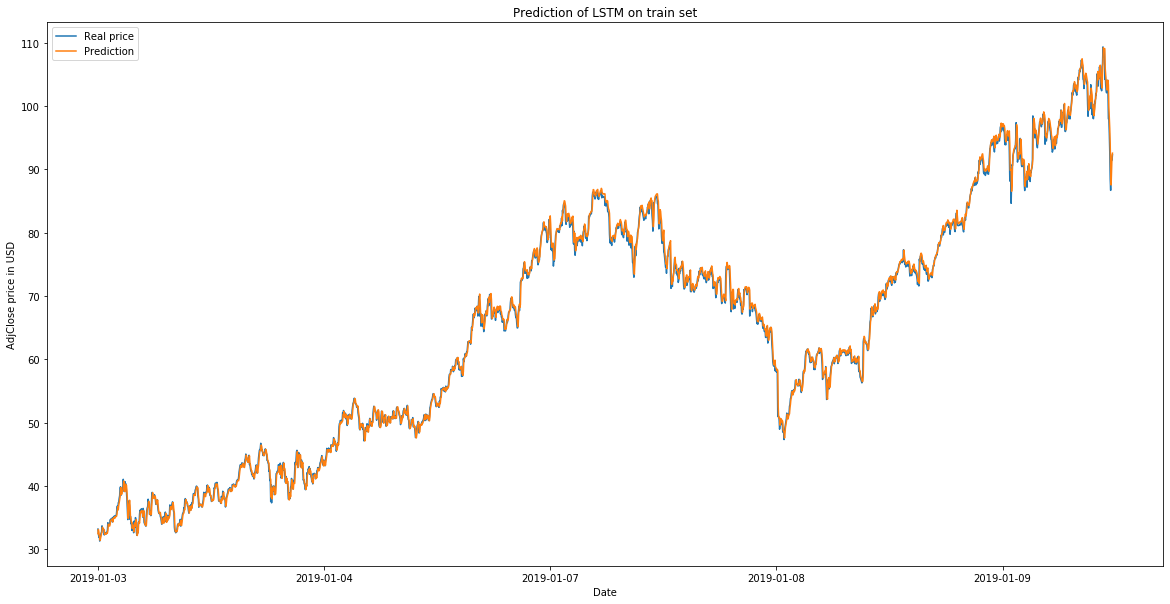

In [65]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(y_train_original_scale_lstm, label="Real price")
plt.plot(prediction_train_original_scale_lstm, label="Prediction")
plt.title('Prediction of LSTM on train set')
plt.legend()
ax.set_xticklabels(y_test.index)
plt.xlabel("Date")
plt.ylabel("AdjClose price in USD")
plt.show()

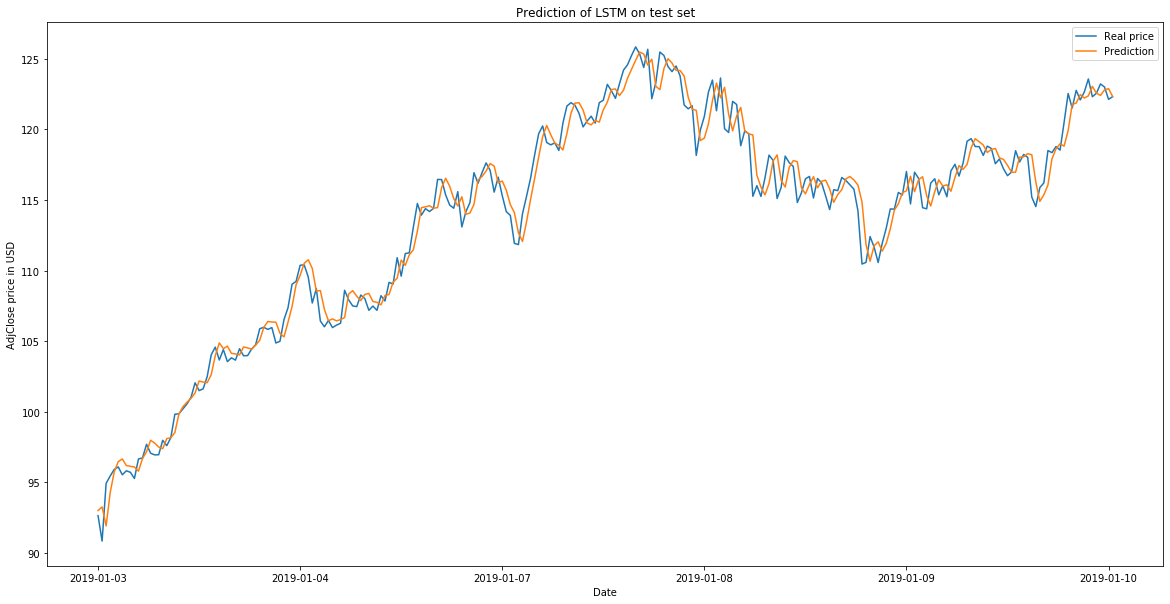

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(y_test_original_scale_lstm, label="Real price")
plt.plot(prediction_test_original_scale_lstm, label="Prediction")
plt.title('Prediction of LSTM on test set')
plt.legend()
ax.set_xticklabels(y_test.index)
plt.xlabel("Date")
plt.ylabel("AdjClose price in USD")
plt.show()

## Recurrent Neural Networks

In [67]:
def hyper_rnn(x_train, y_train,x_val, y_val, params):

    model = Sequential()
    if(params["stacked"]):
        model.add(SimpleRNN(params['units'], dropout=params["dropout"], return_sequences=True))
    model.add(SimpleRNN(params['units'], dropout=params["dropout"]))
    
    

    model.add(Dense(1))
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=0)
    model.compile(optimizer=params['optimizer'], loss=['mean_squared_error'], metrics=[talos.utils.metrics.rmse])
    history = model.fit(x_train, y_train, epochs=params['epochs'],batch_size=params['batch_size'], validation_data=(x_val, y_val),
                        shuffle=True,callbacks=[callback], verbose=0)


    return history, model

In [68]:
parameters_rnn = {
    'units':[50,100],
    'batch_size': [1,5,10],
    'dropout' : [0, 0.2],
    'stacked' :[True, False],
    'epochs':[4],
    'optimizer': ['Adam'],

}

In [69]:
rnn_scan = talos.Scan(x=np.array(X_train),
               y=np.array(y_train),
               model=hyper_rnn,
               params=parameters_rnn,
               val_split=0.1,
               seed=1,
               experiment_name='stock_rnn')

100%|██████████| 24/24 [07:40<00:00, 19.20s/it]


In [70]:
analyze_object = talos.Analyze(rnn_scan)
rnn_scan.data[rnn_scan.data.val_rmse==analyze_object.low('val_rmse')]

start              end  duration  round_epochs      loss  \
18  01/02/21-191647  01/02/21-191653  5.533464             4  0.000509   

       rmse  val_loss  val_rmse  batch_size  dropout  epochs optimizer  \
18  0.01618   0.00047  0.015535          10      0.0       4      Adam   

    stacked  units  
18    False     50

In [71]:
#Get the best performing model (in terms of rmse score on the validation set)
best_model_rnn = rnn_scan.best_model(metric='val_rmse', asc=True)

prediction_train_original_scale_rnn, y_train_original_scale_rnn, prediction_test_original_scale_rnn, y_test_original_scale_rnn, rmse_test_rnn = get_train_test_score(best_model_rnn, scaler, X_train, y_train, X_test, y_test)

Train Score: 1.04 RMSE
Test Score: 1.64 RMSE


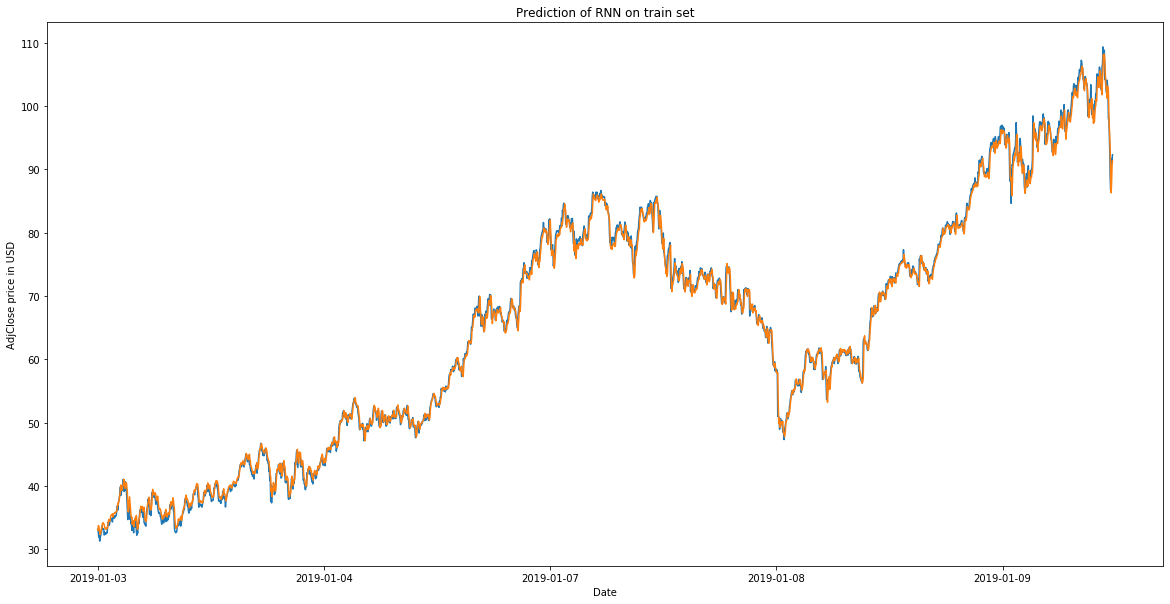

In [72]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(y_train_original_scale_rnn)
plt.plot(prediction_train_original_scale_rnn)
plt.title('Prediction of RNN on train set')
ax.set_xticklabels(y_test.index)
plt.xlabel("Date")
plt.ylabel("AdjClose price in USD")
plt.show()

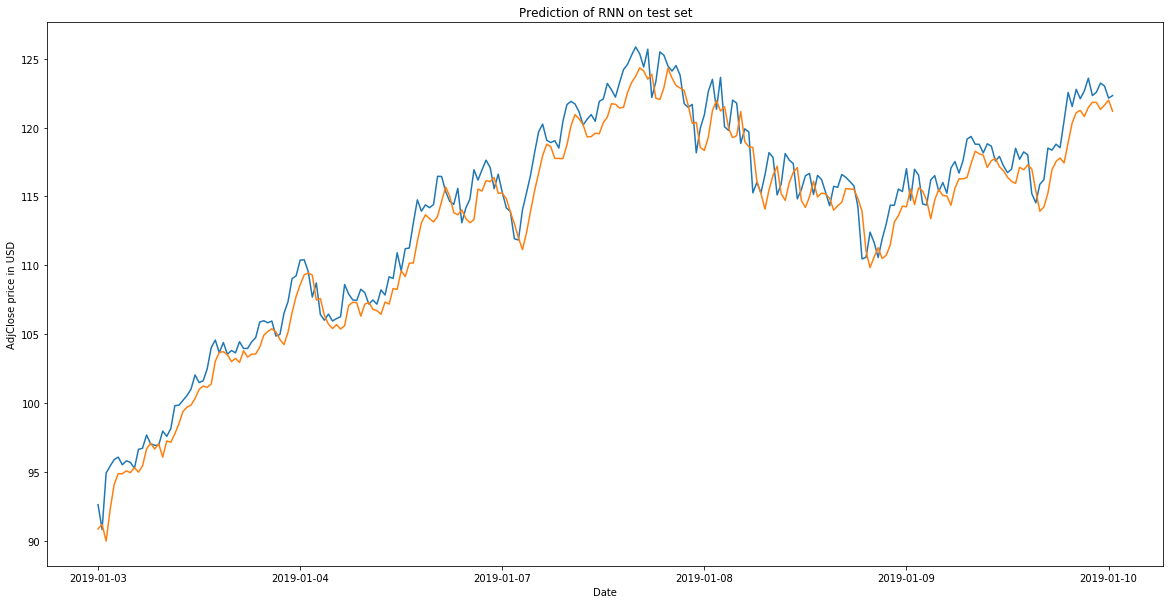

In [73]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(y_test_original_scale_rnn)
plt.plot(prediction_test_original_scale_rnn)
plt.title('Prediction of RNN on test set')
ax.set_xticklabels(y_test.index)
plt.xlabel("Date")
plt.ylabel("AdjClose price in USD")
plt.show()

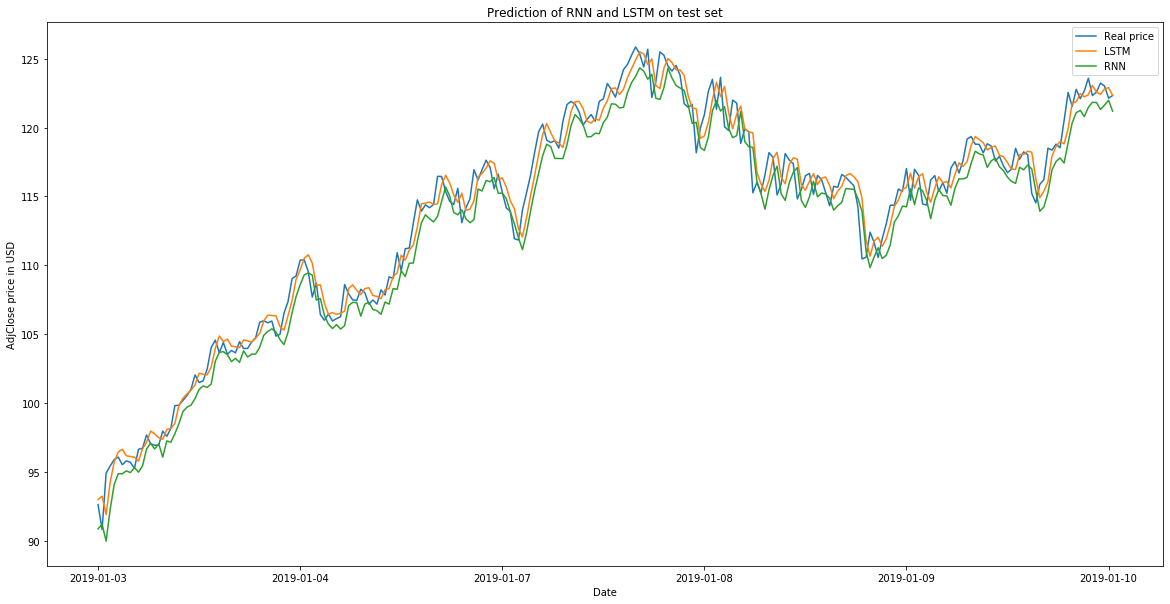

In [74]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(y_test_original_scale_rnn, label="Real price")
plt.plot(prediction_test_original_scale_lstm, label="LSTM")
plt.plot(prediction_test_original_scale_rnn, label="RNN")
plt.title('Prediction of RNN and LSTM on test set')
plt.legend()
ax.set_xticklabels(y_test.index)
plt.xlabel("Date")
plt.ylabel("AdjClose price in USD")
plt.show()

## Test on other companies

In [75]:
from textblob import TextBlob
import glob

In [76]:
all_files = glob.glob("./data/*.csv")
all_files.sort()
datasets = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename,index_col='date', parse_dates=['date'])
    datasets.append(df)

./data/AXP_2010-01-01_to_2020-01-01.csv
./data/BA_2010-01-01_to_2020-01-01.csv
./data/CAT_2010-01-01_to_2020-01-01.csv
./data/CSCO_2010-01-01_to_2020-01-01.csv
./data/CVX_2010-01-01_to_2020-01-01.csv
./data/DIS_2010-01-01_to_2020-01-01.csv
./data/HD_2010-01-01_to_2020-01-01.csv
./data/IBM_2010-01-01_to_2020-01-01.csv
./data/INTC_2010-01-01_to_2020-01-01.csv
./data/JNJ_2010-01-01_to_2020-01-01.csv
./data/JPM_2010-01-01_to_2020-01-01.csv
./data/KO_2010-01-01_to_2020-01-01.csv
./data/MCD_2010-01-01_to_2020-01-01.csv
./data/MMM_2010-01-01_to_2020-01-01.csv
./data/MRK_2010-01-01_to_2020-01-01.csv
./data/MSFT_2010-01-01_to_2020-01-01.csv
./data/PG_2010-01-01_to_2020-01-01.csv
./data/TRV_2010-01-01_to_2020-01-01.csv
./data/VZ_2010-01-01_to_2020-01-01.csv
./data/WMT_2010-01-01_to_2020-01-01.csv


In [78]:
def train_lstm(x_train, y_train, params):
        model = Sequential()
        model.add(LSTM(params['units_first_layer'], name='lstm', dropout=params['dropout'], recurrent_dropout= params['recurrent_dropout'],input_shape = (x_train.shape[1],1)) )
        model.add(Dense(1))

        model.compile(optimizer=params['optimizer'], loss=['mean_squared_error'], metrics=[talos.utils.metrics.rmse])
        model.fit(x_train, y_train, epochs=params['epochs'],batch_size=params['batch_size'],
                            shuffle=True, verbose=0)
        return model

In [79]:
def transform_train_test_lstm(ds_current):

    current_company = ds_current.symbol[0]
    ds_current = ds_current[["adjClose"]]
    
    ds_current.columns=['y']
    scaler = MinMaxScaler(feature_range=(-1, 1))
    ds_current_scaled = pd.DataFrame(data = scaler.fit_transform(ds_current), index = ds_current.index.values)
    ds_current_scaled.head()

    moving_avg = ds_current_scaled.rolling(window, min_periods=window).mean()[window:]
    exponential_moving_avg = ds_current_scaled.ewm(alpha=0.1, adjust=False).mean()[window:]
    cumulative_moving_avg = ds_current_scaled.expanding().mean()[window:]
    rstd = ds_current_scaled.rolling(window=window).std()[window:]
    upper_bollinger_band = moving_avg + 2 * rstd
    lower_bollinger_band = moving_avg - 2 * rstd

    X = transform_data(ds_current_scaled)

    X = pd.concat([ moving_avg, upper_bollinger_band, lower_bollinger_band,exponential_moving_avg, cumulative_moving_avg,X], axis=1)

    y = ds_current_scaled[window:]


    start_training_date = y.index[0] #date predicted

    df_train = X[X.index <= pd.to_datetime(end_training_date)]
    df_test = X[X.index > pd.to_datetime(end_training_date)]
    y_train = y[y.index <= pd.to_datetime(end_training_date)]



    X_train = df_train.values.reshape((df_train.shape[0], df_train.shape[1], 1))
    print('Train set shape:',X_train.shape)
    y_train = y[y.index <= pd.to_datetime(end_training_date)]
    X_test = df_test.values.reshape((df_test.shape[0], df_test.shape[1], 1)) 
    print('Test set shape:',X_test.shape)
    
    y_test = y[y.index > pd.to_datetime(end_training_date)]

    print("Training LSTM model")
    model = train_lstm(X_train, y_train, lstm_best_params)
    prediction_train_original_scale, y_train_original_scale, prediction_test_original_scale, y_test_original_scale, rmse_test = get_train_test_score(model,scaler, X_train, y_train, X_test, y_test)

    fig, ax = plt.subplots(figsize=(20,10))
    plt.plot(y_test_original_scale, label="Real price")
    plt.plot(prediction_test_original_scale, label="Prediction")
    plt.title('Prediction of {} on test set'.format(current_company))
    plt.legend()
    ax.set_xticklabels(y_test.index)
    plt.xlabel("Date")
    plt.ylabel("AdjClose price in USD")
    plt.figtext(0.5, 0.07, "Test RMSE: {}".format('{:.2f}'.format(rmse_test)), ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
    plt.savefig('./plots/{}_test.png'.format(current_company))


-----Processing dataset:0 -----

Train set shape: (2244, 25, 1)
Test set shape: (252, 25, 1)
Training LSTM model
Train Score: 1.00 RMSE
Test Score: 1.24 RMSE
-----Processing dataset:1 -----

Train set shape: (2244, 25, 1)
Test set shape: (252, 25, 1)
Training LSTM model
Train Score: 3.03 RMSE
Test Score: 7.03 RMSE
-----Processing dataset:2 -----

Train set shape: (2244, 25, 1)
Test set shape: (252, 25, 1)
Training LSTM model
Train Score: 1.49 RMSE
Test Score: 2.15 RMSE
-----Processing dataset:3 -----

Train set shape: (2244, 25, 1)
Test set shape: (252, 25, 1)
Training LSTM model
Train Score: 0.46 RMSE
Test Score: 0.81 RMSE
-----Processing dataset:4 -----

Train set shape: (2244, 25, 1)
Test set shape: (252, 25, 1)
Training LSTM model
Train Score: 1.15 RMSE
Test Score: 1.61 RMSE
-----Processing dataset:5 -----

Train set shape: (2244, 25, 1)
Test set shape: (252, 25, 1)
Training LSTM model
Train Score: 1.29 RMSE
Test Score: 1.89 RMSE
-----Processing dataset:6 -----

Train set shape: (2

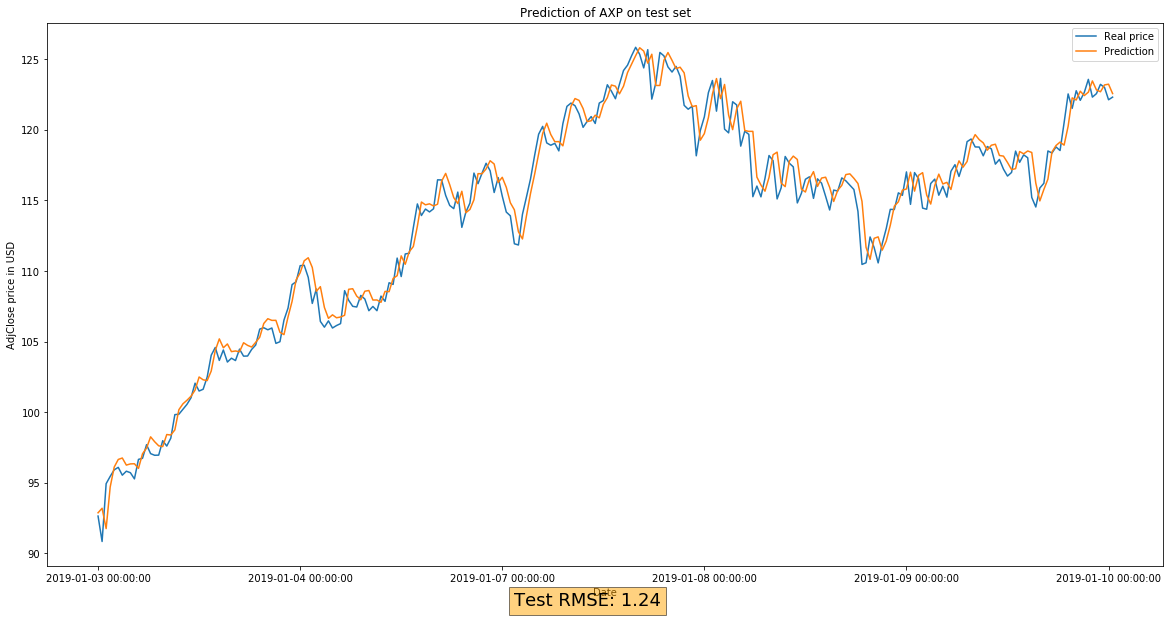

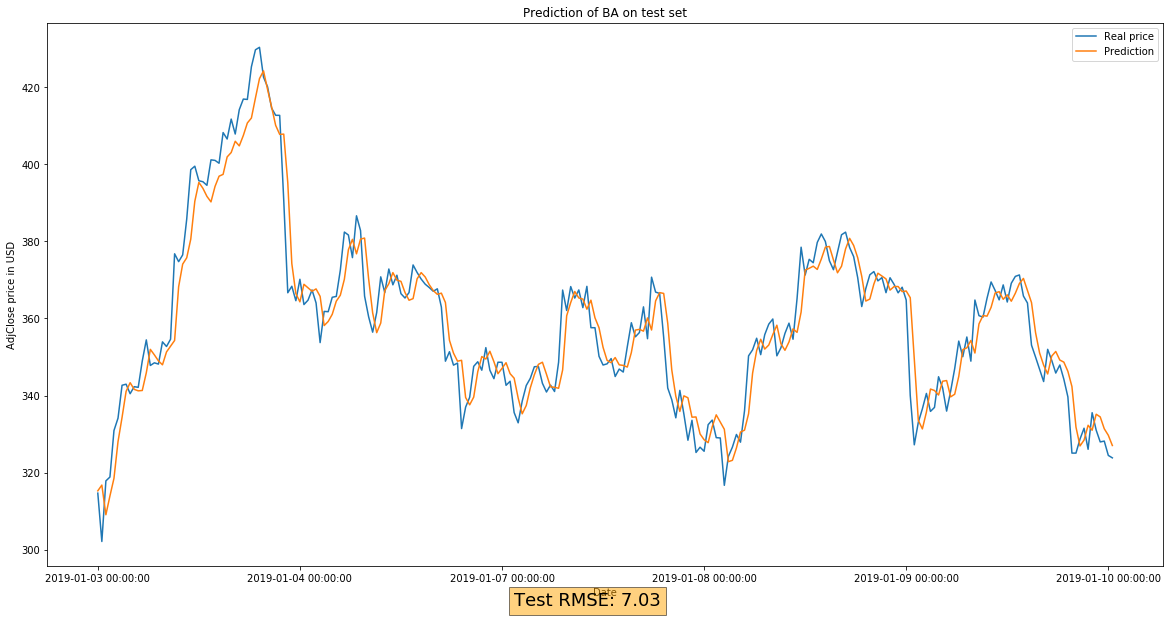

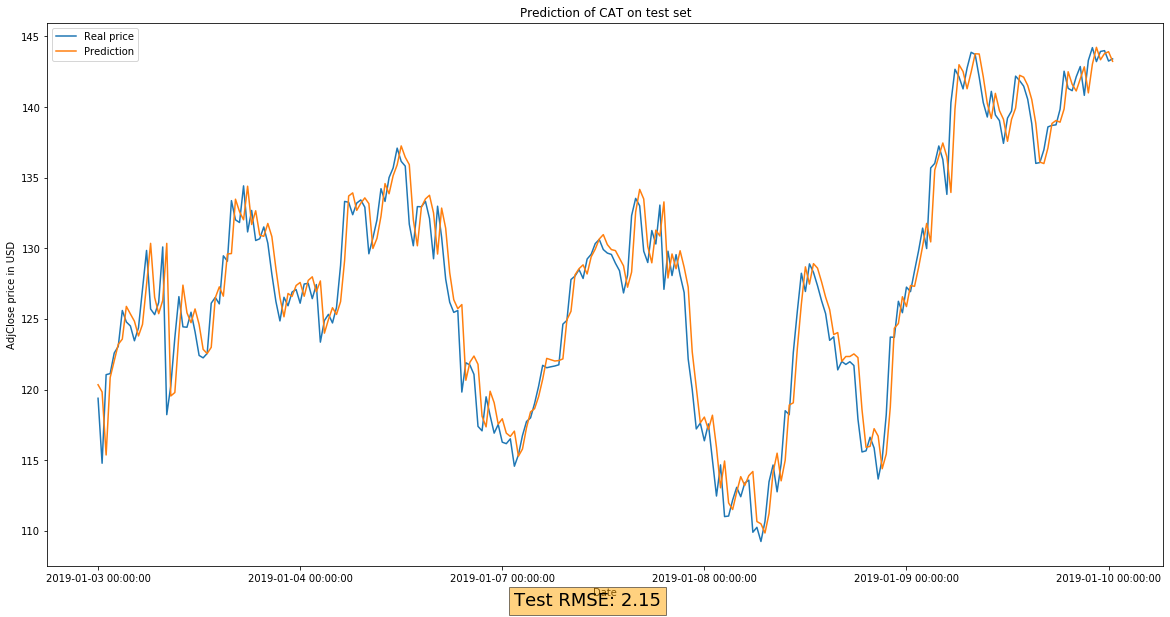

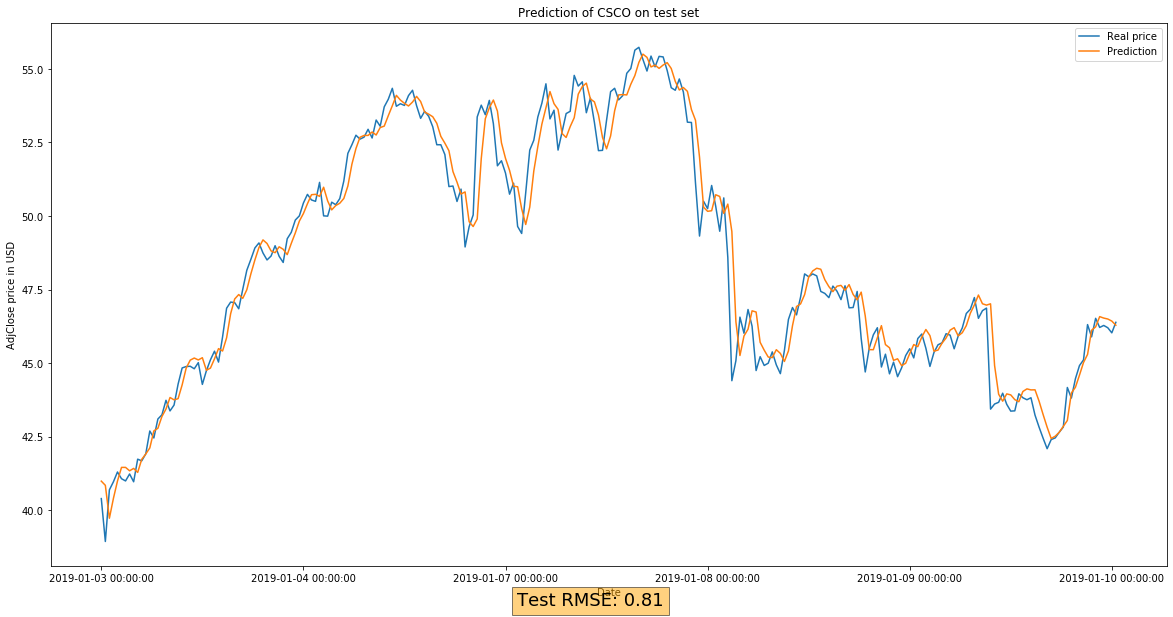

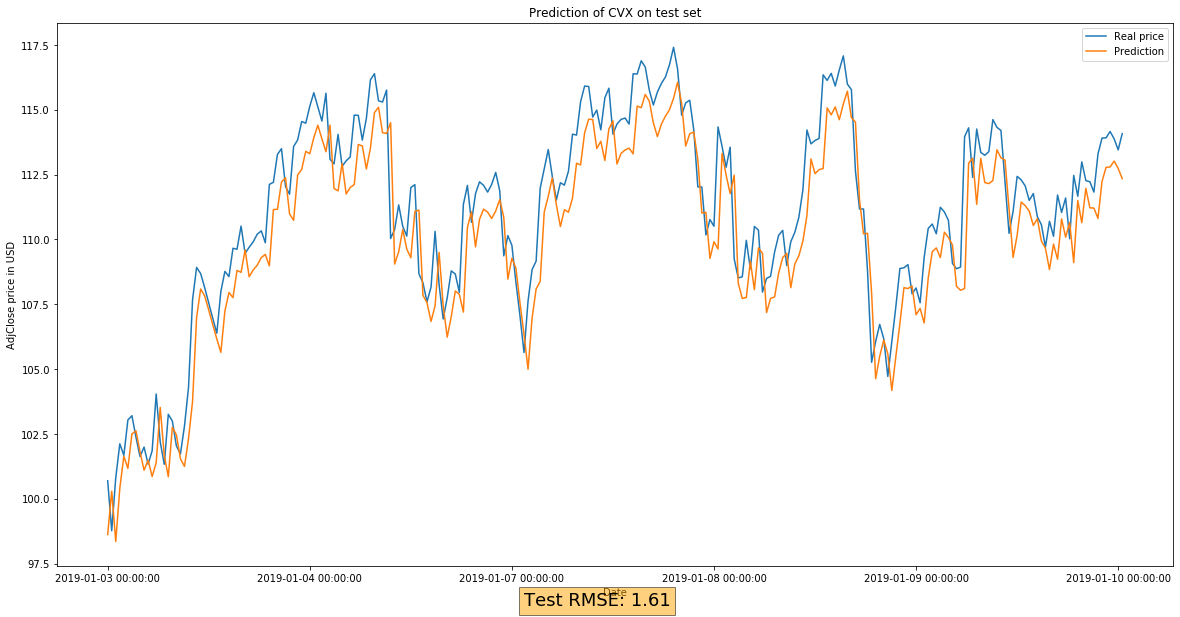

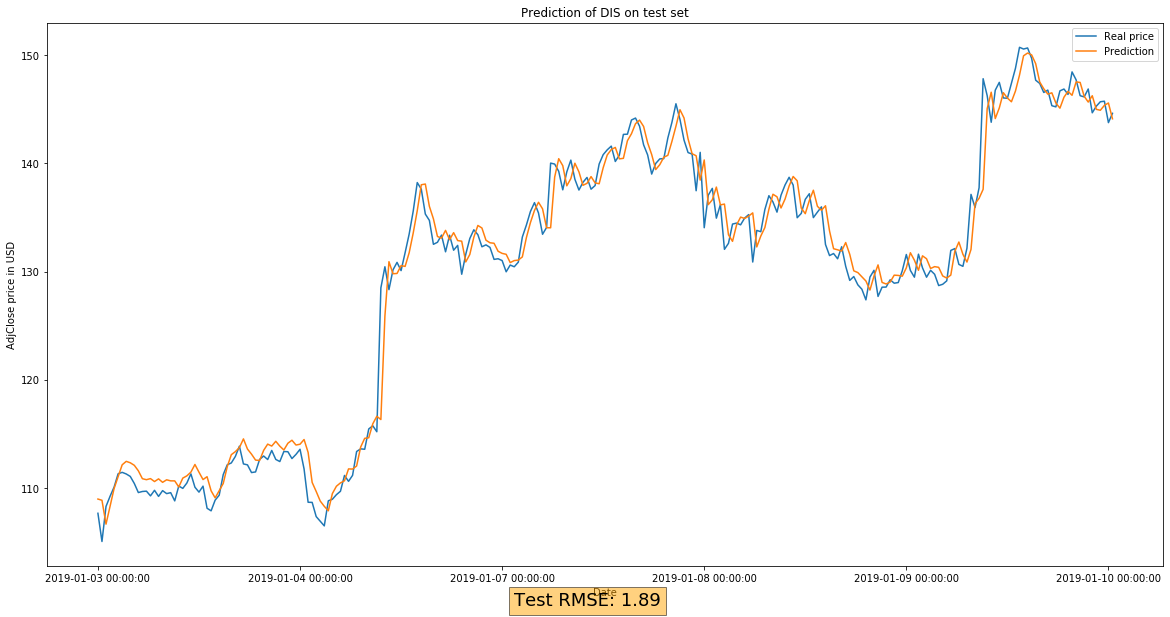

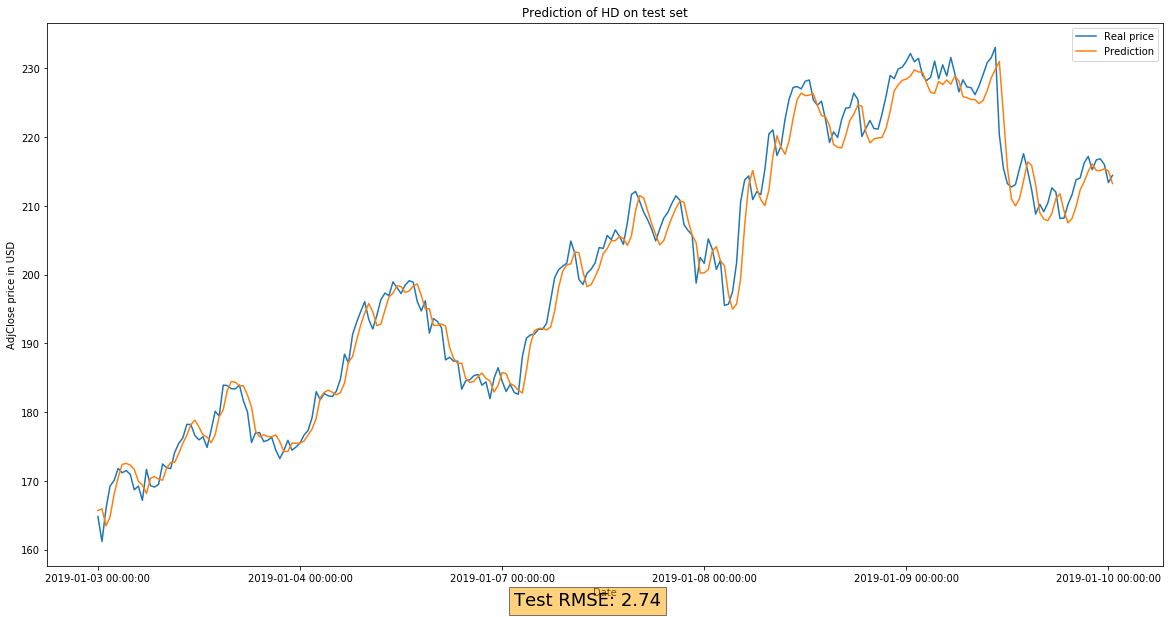

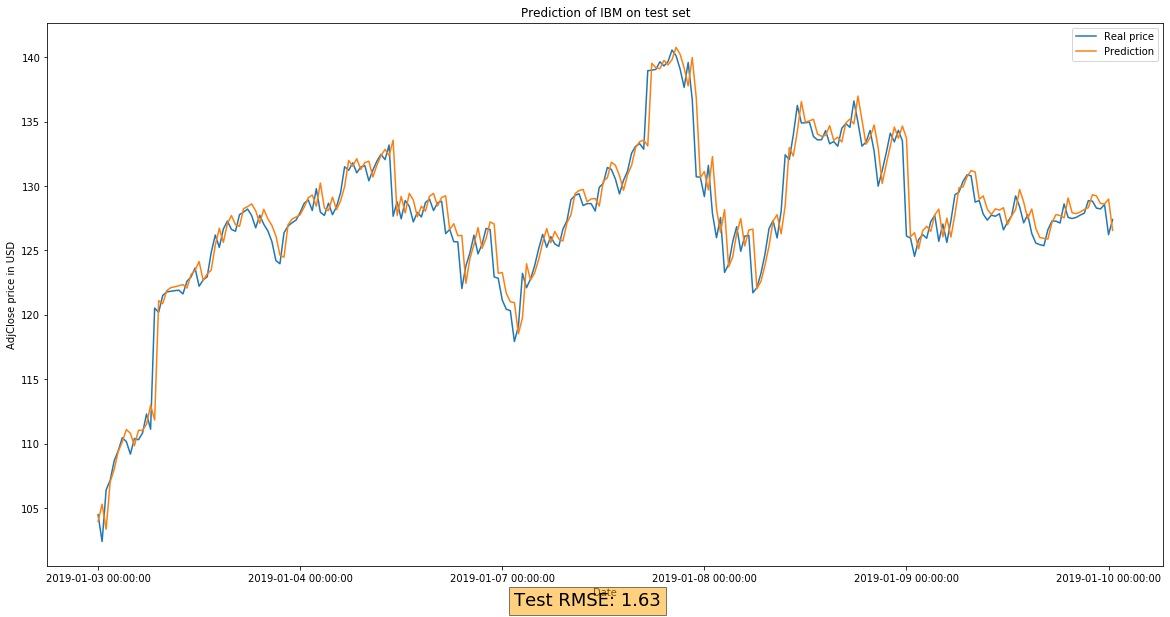

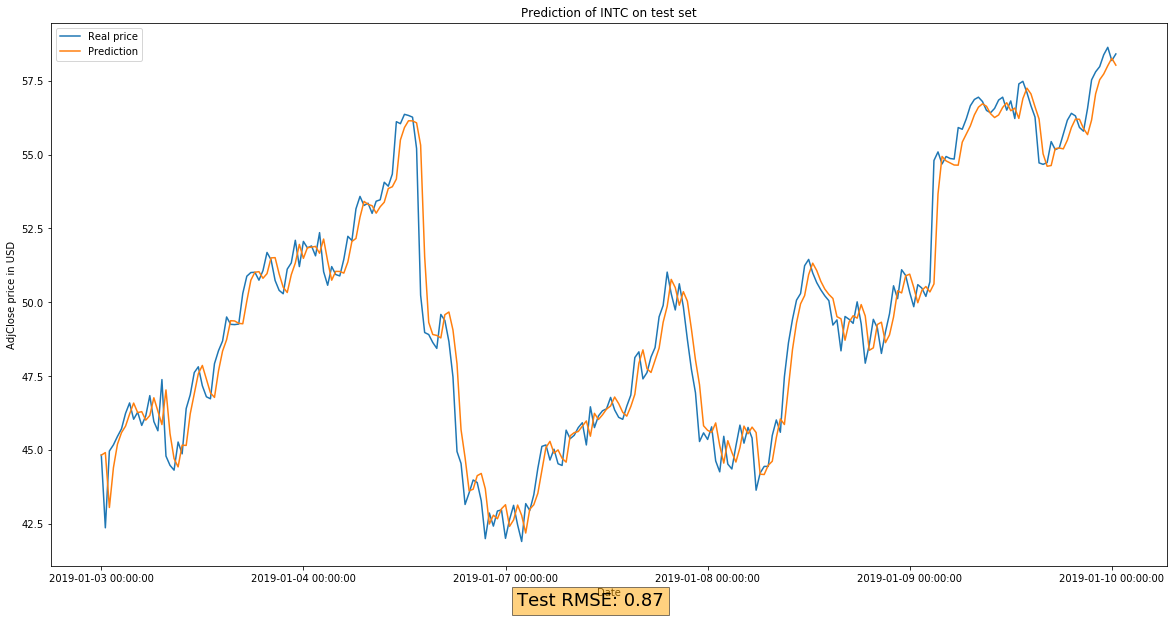

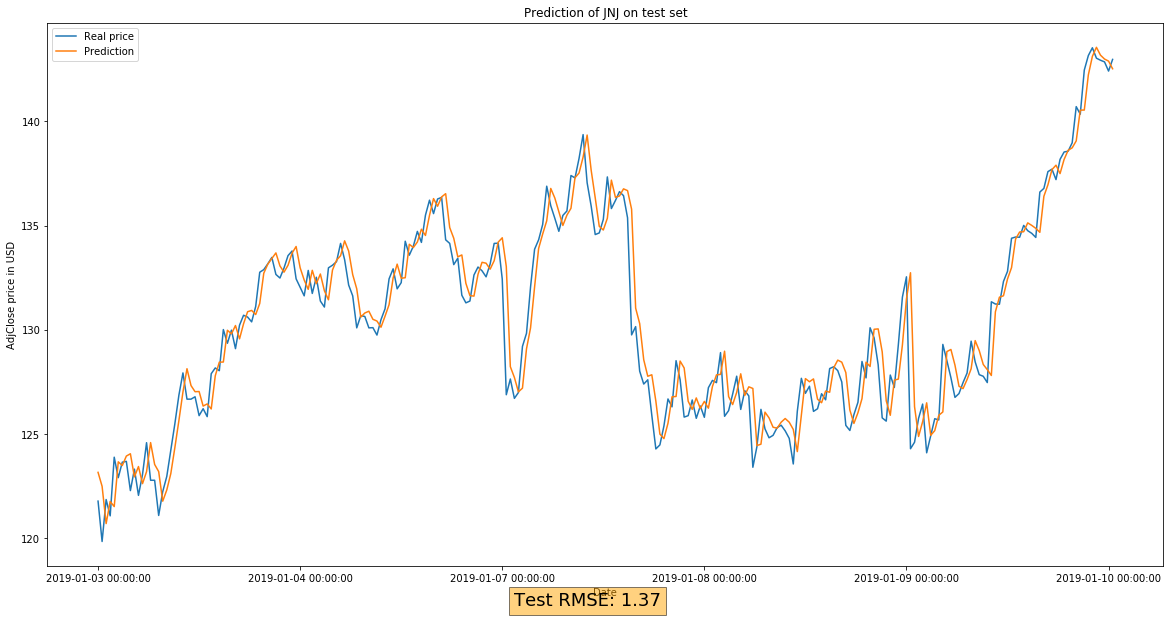

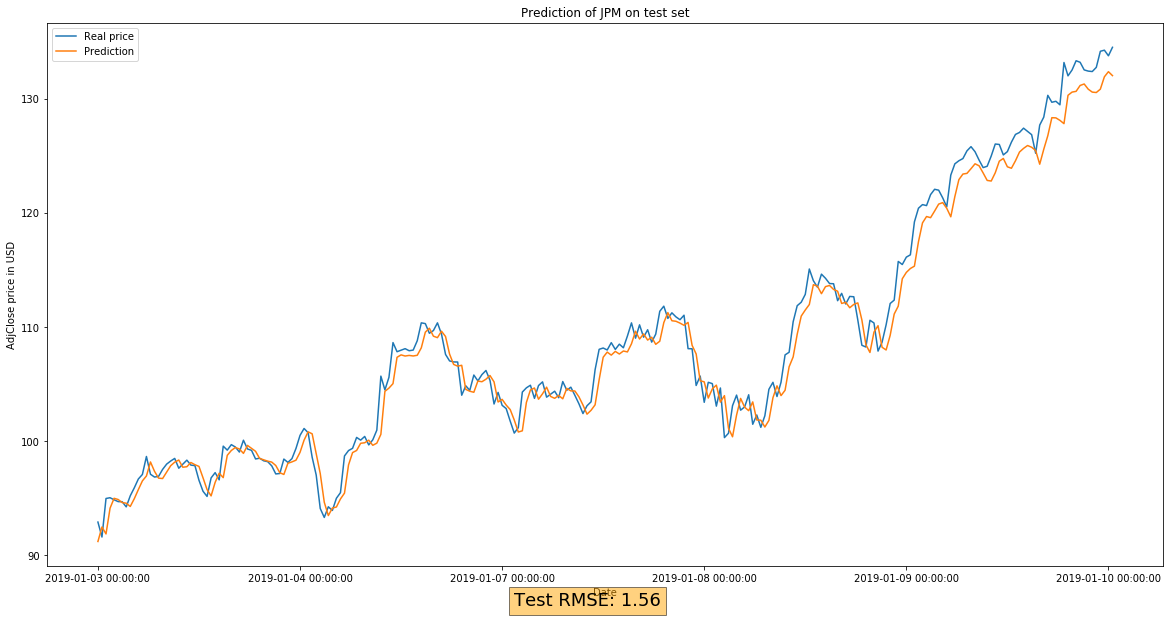

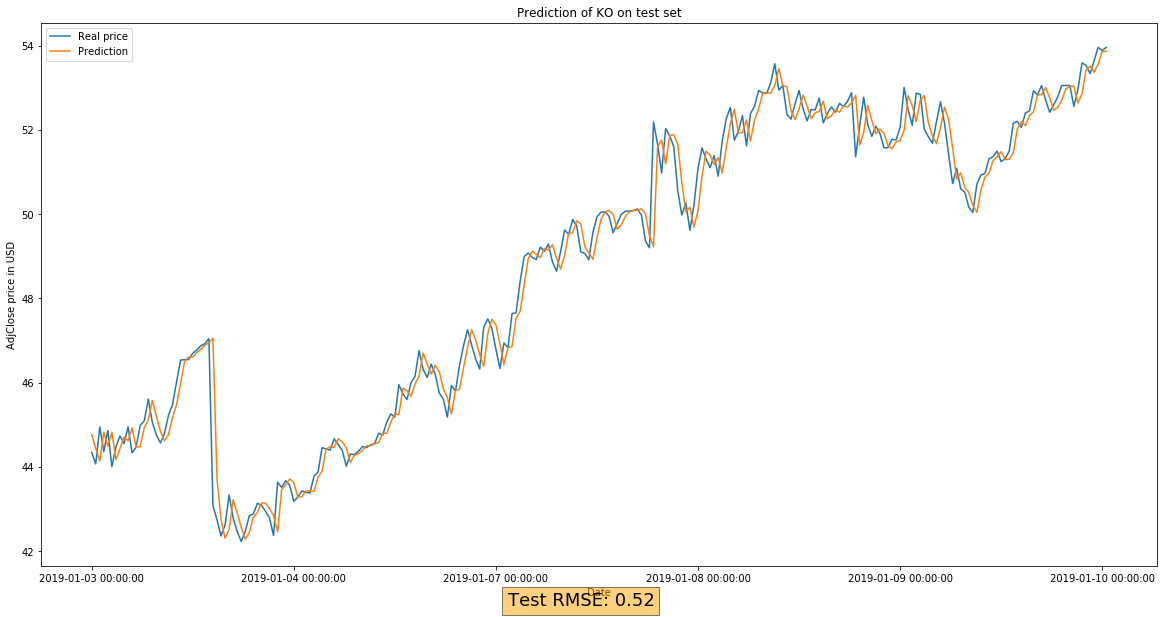

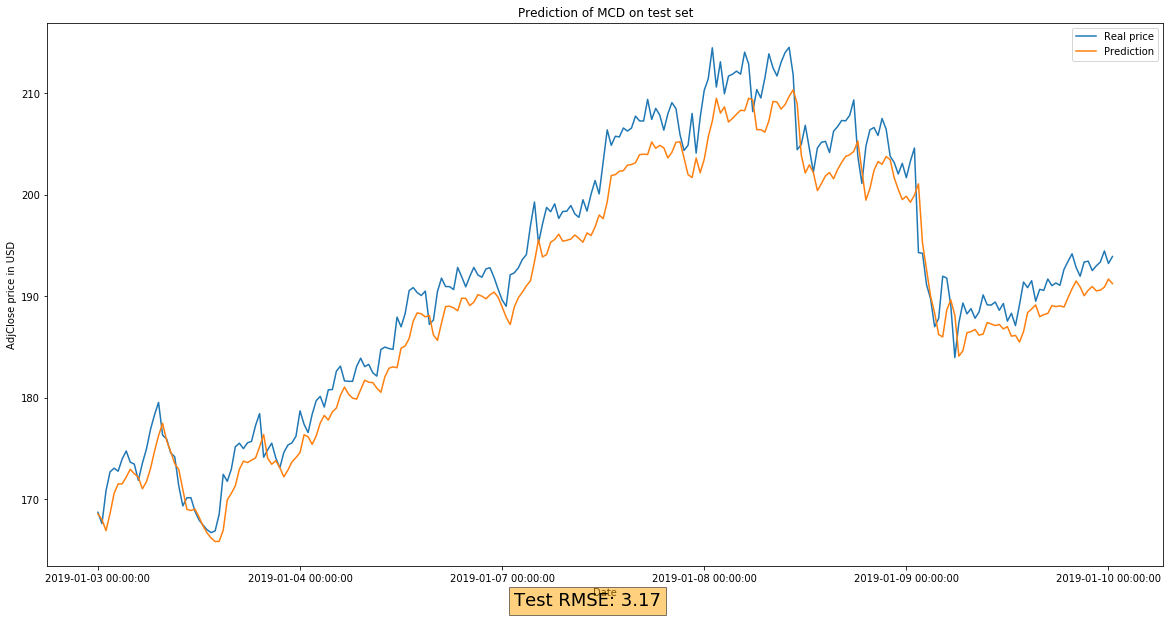

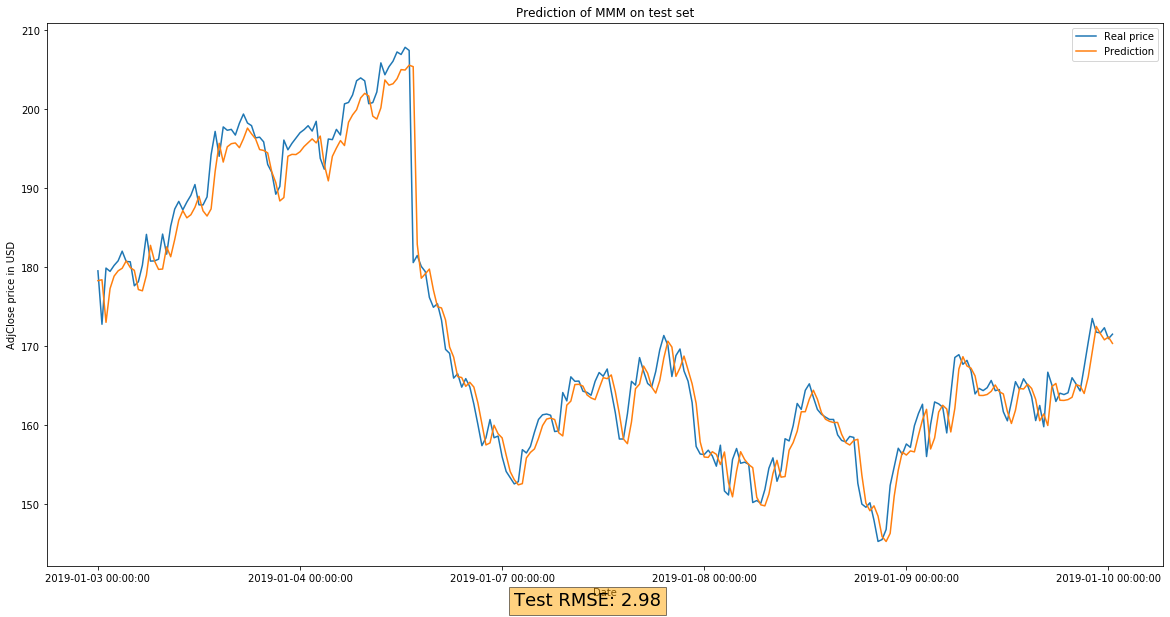

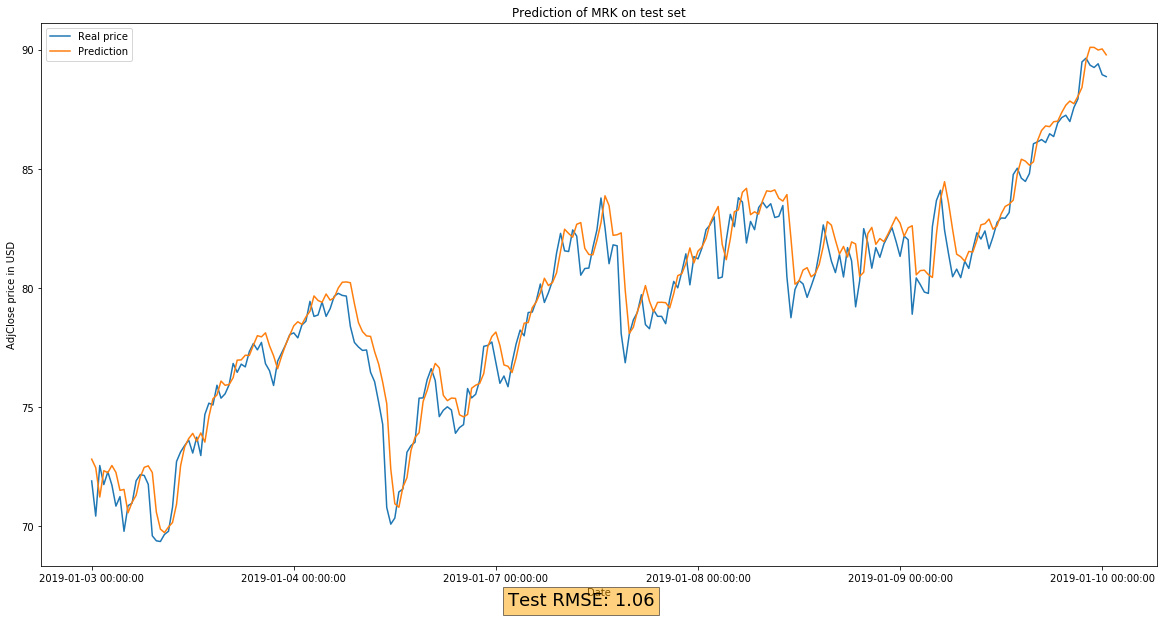

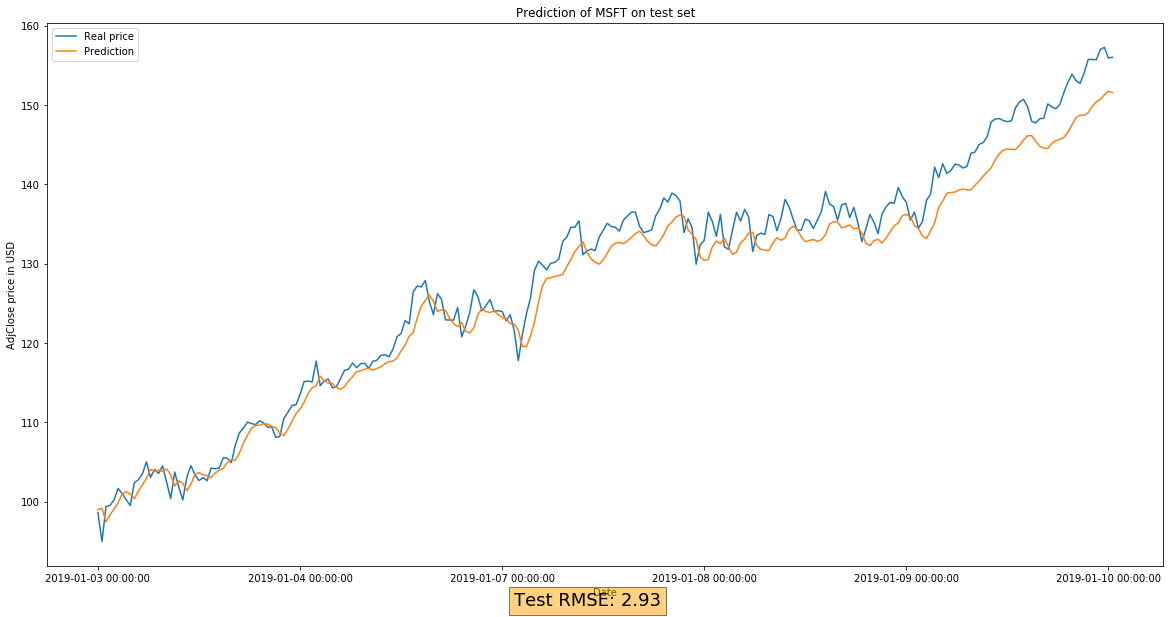

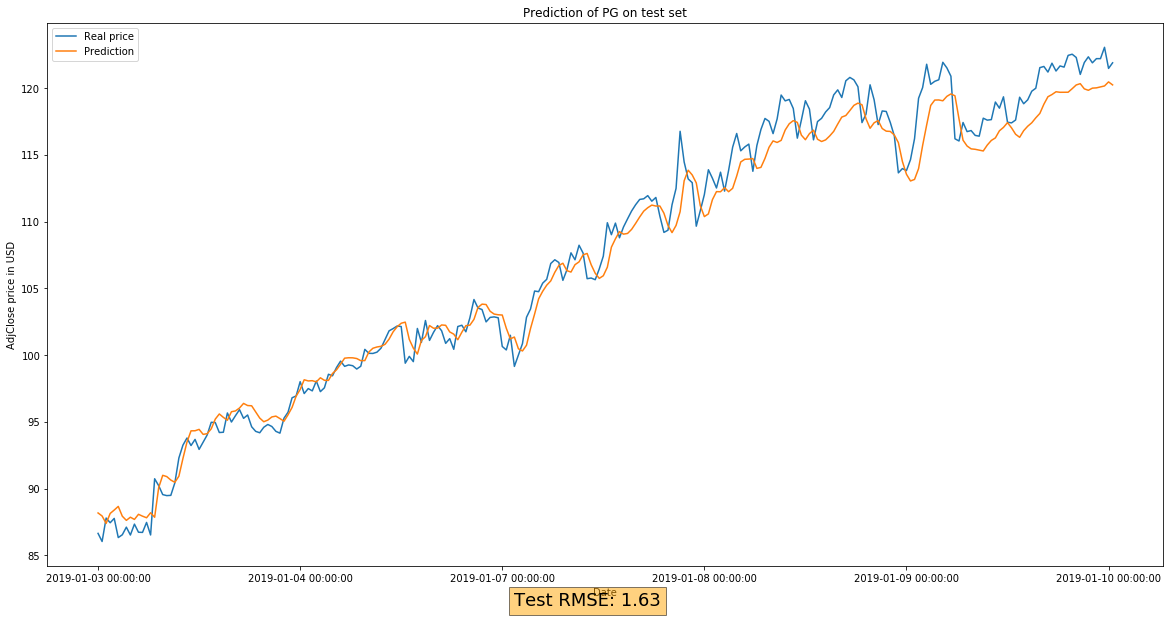

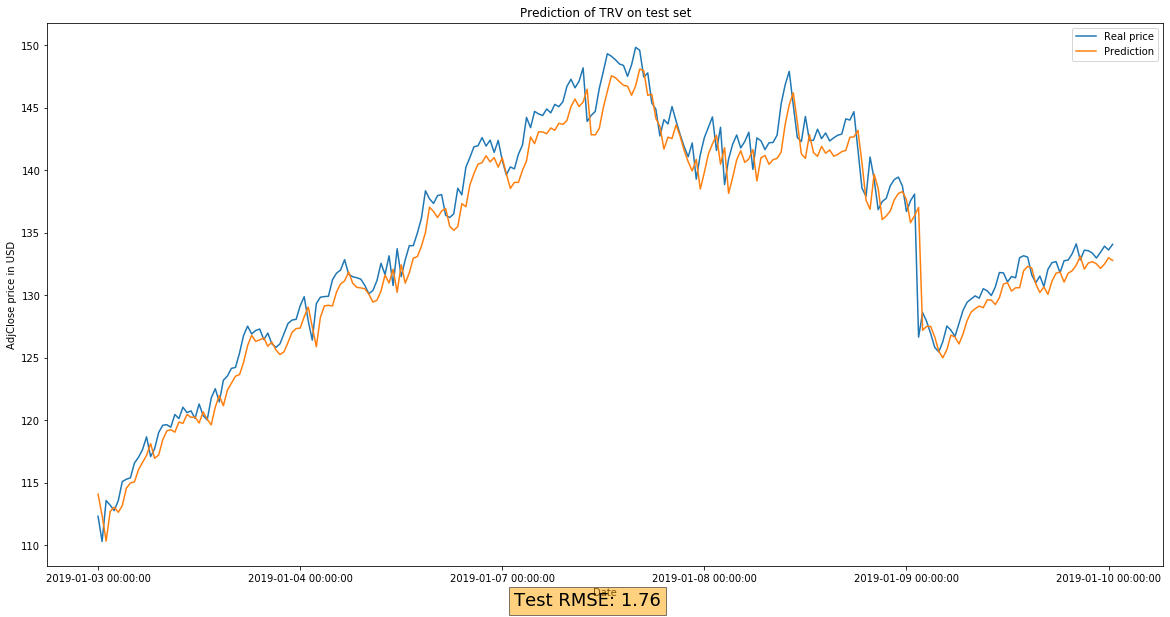

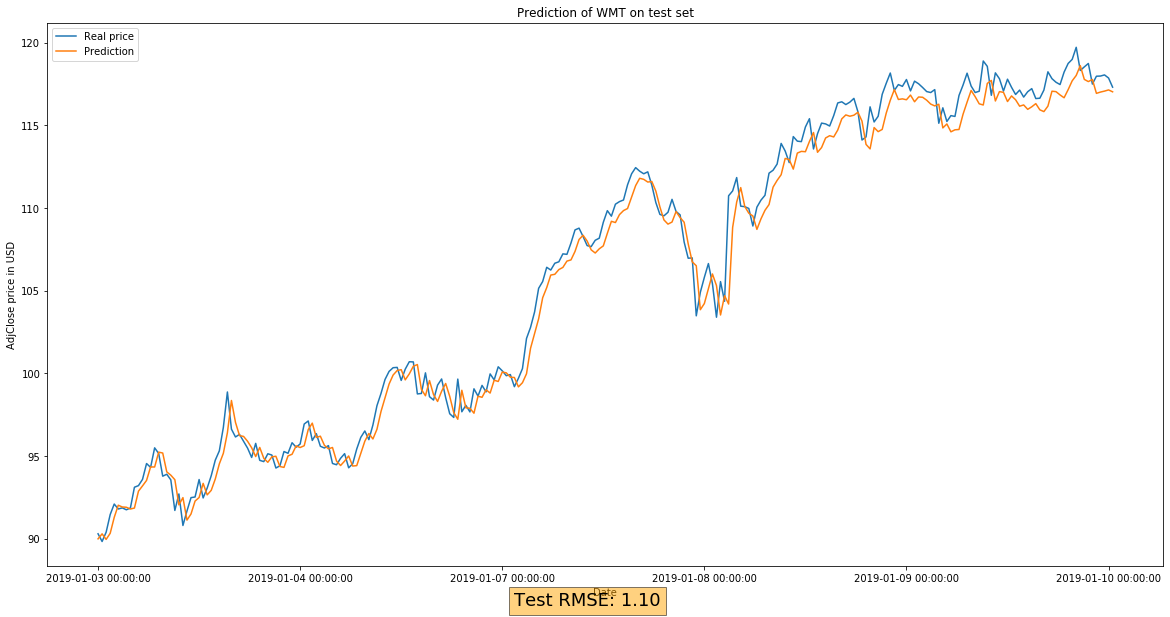

In [80]:
for i, ds in enumerate(datasets):
    print("-----Processing dataset:{} -----".format(i))
    print('')
    transform_train_test_lstm(ds)
    

Taking a closer look at the problmatic stock (Boeing company)

Text(0.5, 1.0, 'Boering Stock price')

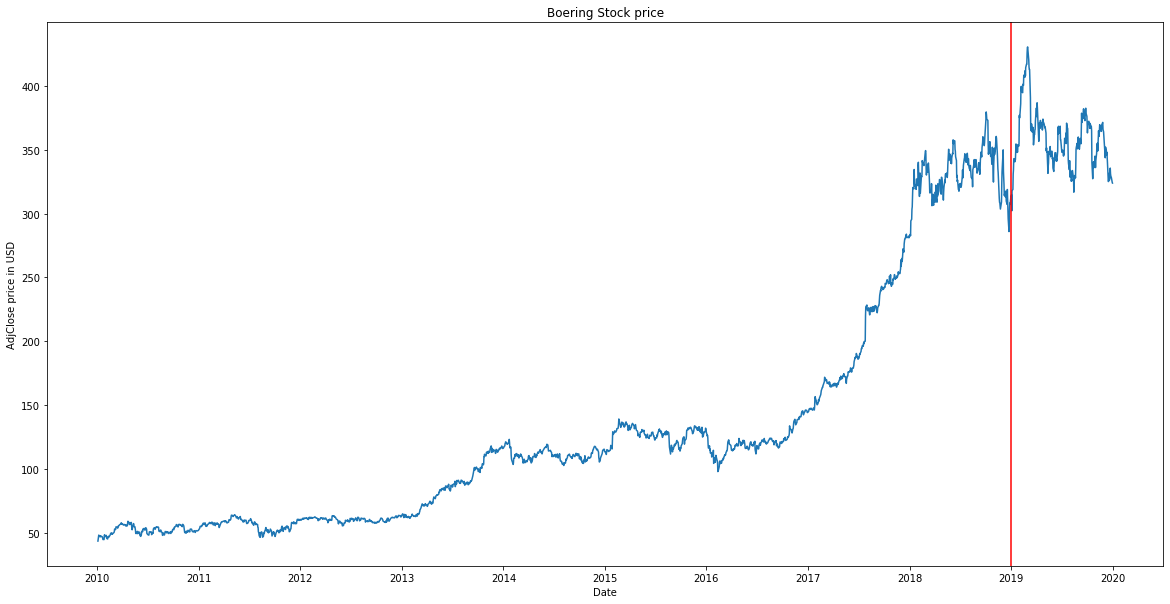

In [82]:
import datetime as dt

boeing = pd.read_csv('./data/BA_2010-01-01_to_2020-01-01.csv',index_col="date").adjClose
boeing.index = pd.to_datetime(boeing.index)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(boeing, label="Real price")
plt.axvline(dt.datetime(2019, 1, 1), color='red')
plt.xlabel("Date")
plt.ylabel("AdjClose price in USD")
plt.title("Boering Stock price")